In [1]:
## Provide a wider display for easier viewing
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
## Remove some warnings for pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Import the necessary libraries

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar

In [3]:
## Find the data files first

team_folder = "D:/Group Folder/Datasets/"

coupon_grp = "CouponGroup.csv"

coupon_dim = "DimCoupon.csv"

player_dim = "DimPlayer.csv"

coupon_fact = "FactCouponRedeem.csv"

player_day = "PlayerDay.csv"

zipcodes = "zipcode.csv"

In [4]:
team_folder + coupon_grp

'D:/Group Folder/Datasets/CouponGroup.csv'

In [5]:
## Load in the fact table - just do it in one shot

coupon_fact_df = pd.read_csv(team_folder+coupon_fact, low_memory = False, 
                             encoding = "cp1252")

In [6]:
## Generate summary statistics

coupon_fact_df.describe()

,CouponID,PlayerID,RedeemValue,RedeemCount,SiteID,RedemptionNumber,ValidMonth,ValidYear
count,2.777358e+06,2.777358e+06,2.777358e+06,2.777358e+06,2.777358e+06,1.907100e+05,2.777358e+06,2.777358e+06
mean,9.274712e+04,7.053240e+08,2.386644e+01,1.004516e+00,1.578012e+00,1.858328e+07,6.218163e+00,1.738322e+01
std,1.486246e+04,2.599271e+08,2.688272e+01,8.191522e-02,4.938768e-01,1.110173e+06,3.262830e+00,1.891812e+00
min,1.000000e+00,3.300000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.666513e+07,1.000000e+00,5.000000e+00
25%,9.124200e+04,5.303723e+08,1.000000e+01,1.000000e+00,1.000000e+00,1.764133e+07,4.000000e+00,1.700000e+01
50%,9.484000e+04,7.103038e+08,2.300000e+01,1.000000e+00,2.000000e+00,1.867601e+07,6.000000e+00,1.800000e+01
75%,9.906600e+04,1.000156e+09,2.900000e+01,1.000000e+00,2.000000e+00,1.961201e+07,9.000000e+00,1.800000e+01
max,1.034460e+05,1.000805e+09,5.000000e+03,1.000000e+01,2.000000e+00,2.029006e+07,1.200000e+01,2.200000e+01


In [7]:
## Confirm the row count for the fact table

len(coupon_fact_df)

2777358

In [8]:
## Review the column names

coupon_fact_df.columns

Index(['CouponID', 'Description', 'PlayerID', 'AccountingDate', 'RedeemValue',
       'RedeemCount', 'SiteID', 'RedemptionNumber', 'ValidMonth', 'ValidYear',
       'TypeCategory', 'TypeDescription', 'SubType', 'SubTypeDescription',
       'TargetPopKey', 'TargetPop', 'ProgramTypeKey', 'ProgramType'],
      dtype='object')

In [9]:
## Create a new field with Date in the right format

coupon_fact_df["Date"] = pd.to_datetime(coupon_fact_df["AccountingDate"])

In [10]:
## Create two columns using the newly generated Date field to extract Month and Year - we'll use this to aggregate and help our analyses run a little faster

coupon_fact_df["Month"] = coupon_fact_df["Date"].dt.month
coupon_fact_df["Year"] = coupon_fact_df["Date"].dt.year

In [11]:
## View the first five rows of the table

coupon_fact_df.head(5)

,CouponID,Description,PlayerID,AccountingDate,RedeemValue,RedeemCount,SiteID,RedemptionNumber,ValidMonth,ValidYear,...,TypeDescription,SubType,SubTypeDescription,TargetPopKey,TargetPop,ProgramTypeKey,ProgramType,Date,Month,Year
0,89729,M1216VHNY- VIP NYE HTL,530342410,2017-01-01,29.0,1,1,NaN,12,16,...,Hotel,a,ML,a,VIP,N,Not Applicable,2017-01-01,1,2017
1,89729,M1216VHNY- VIP NYE HTL,710328524,2017-01-01,29.0,1,1,NaN,12,16,...,Hotel,a,ML,a,VIP,N,Not Applicable,2017-01-01,1,2017
2,89093,C1016OGDO1E-Decline GP WKND 5,1000600137,2017-01-01,5.0,1,2,NaN,10,16,...,Free Slot Gaming,a,Grand Play,N,Not Applicable,N,Not Applicable,2017-01-01,1,2017
3,89729,M1216VHNY- VIP NYE HTL,710004002,2017-01-01,29.0,1,1,NaN,12,16,...,Hotel,a,ML,a,VIP,N,Not Applicable,2017-01-01,1,2017
4,4,HNEW MEMBER TRACKING,1000681589,2017-01-01,0.0,1,2,NaN,4,7,...,Other,O,Other,c,New Member,N,Not Applicable,2017-01-01,1,2017


## First batch of descriptive statistics - Promotion Type Analysis

In [12]:
coupon_fact_df.tail(5)

,CouponID,Description,PlayerID,AccountingDate,RedeemValue,RedeemCount,SiteID,RedemptionNumber,ValidMonth,ValidYear,...,TypeDescription,SubType,SubTypeDescription,TargetPopKey,TargetPop,ProgramTypeKey,ProgramType,Date,Month,Year
2777353,102997,Hbb1019XNOGAR-GenR FreeStay,710691749,2019-10-23,0.01,1,2,20290009.0,10,19,...,Hotel,b,HK,N,Not Applicable,O,Other,2019-10-23,10,2019
2777354,102967,Mba1019cda239STHL-$39 2nite 39T,710752568,2019-10-23,0.01,1,2,NaN,10,19,...,Hotel,a,ML,d,Loyalty,a,Gazette,2019-10-23,10,2019
2777355,4,HNEW MEMBER TRACKING,1000804989,2019-10-23,0.00,1,2,NaN,4,7,...,Other,O,Other,c,New Member,N,Not Applicable,2019-10-23,10,2019
2777356,102902,Hea0919XNN$10GPAPP-$10GPApp,1000474011,2019-10-24,10.00,1,2,NaN,9,19,...,Free Slot Gaming,a,Grand Play,N,Not Applicable,N,Not Applicable,2019-10-24,10,2019
2777357,102926,Hea0919XNNgp10print-GP10print,1000474011,2019-10-24,0.01,1,2,20290058.0,9,19,...,Free Slot Gaming,a,Grand Play,N,Not Applicable,N,Not Applicable,2019-10-24,10,2019


In [13]:
## Determine if there are any records in the fact table with 0 in the "RedeemCount" field
## Anything with zero means it did not get redeemed and should be excluded

coupon_fact_df.RedeemCount.unique()

array([ 1,  2,  0,  4,  3,  5, 10,  8,  6,  9], dtype=int64)

In [14]:
## Remove those rows with nothing in the RedeemCount - so we just look at redeemed coupons

redeemed_coupon_df = coupon_fact_df[coupon_fact_df.RedeemCount != 0]

In [15]:
len(redeemed_coupon_df)

2777131

## First demonstration of dimensionality reduction - Aggregation

#### By summarizing the data using an aggregate table, we don't have to concern ourselves with a major data set.

In [16]:
## Build an aggregate table of all redeemed coupons
## Group by time, casino site, type, and sub type
## Use this to determine "successful" promotions

redeemed_coupon_aggregation = redeemed_coupon_df.groupby(["Month", "Year", "SiteID", "TypeDescription", 
                        "SubTypeDescription"]) \
                            .agg({"RedeemCount": ["sum", "count", "mean", "min", "max"]}).reset_index()

In [17]:
## Check row count of newly created table

len(redeemed_coupon_aggregation)

987

In [18]:
## Show the first 20 rows of the first aggregation to see what type/subtypes are being redeemed the most

redeemed_coupon_aggregation.sort_values(by = ("RedeemCount", "sum"), ascending = False).head(20)

Month  Year SiteID TypeDescription SubTypeDescription RedeemCount         \
                                                                  sum  count   
14      1  2017      2            Cash              Bonus       24004  24004   
95      2  2017      2            Cash              Bonus       22682  22682   
533     7  2017      2           Hotel                All       19005  19005   
620     8  2017      2           Hotel                All       18982  18982   
797    10  2017      2            Cash              Bonus       18499  18499   
43      1  2018      2            Cash              Bonus       18431  18431   
189     3  2017      2           Hotel                All       18009  18009   
362     5  2017      2           Hotel                All       17784  17784   
645     8  2018      2            Cash              Bonus       17264  17264   
279     4  2017      2           Hotel                All       17229  17220   
180     3  2017      2            Cash              Bonus       17091  17091   
717     9  2017      2           Hotel                All       16616  16615   
451     6  2017      2           Hotel                All       16574  16573   
798    10  2017      2            Cash               Cash       16144  16144   
500     6  2019      2            Cash              Bonus       15787  15787   
804    10  2017      2           Hotel                All       15689  15688   
525     7  2017      2            Cash              Bonus       15608  15608   
103     2  2017      2           Hotel                All       15051  15051   
308     4  2018      2           Hotel                All       14744  14743   
613     8  2017      2            Cash            Mystery       14548  14548   

                       
         mean min max  
14   1.000000   1   1  
95   1.000000   1   1  
533  1.000000   1   1  
620  1.000000   1   1  
797  1.000000   1   1  
43   1.000000   1   1  
189  1.000000   1   1  
362  1.000000   1   1  
645  1.000000   1   1  
279  1.000523   1  10  
180  1.000000   1   1  
717  1.000060   1   2  
451  1.000060   1   2  
798  1.000000   1   1  
500  1.000000   1   1  
804  1.000064   1   2  
525  1.000000   1   1  
103  1.000000   1   1  
308  1.000068   1   2  
613  1.000000   1   1

In [19]:
## Remove siteID and date features to just get raw counts of each promotion

redeemed_coupon_type_sub_agg = redeemed_coupon_df.groupby(["TypeDescription", 
                        "SubTypeDescription"]) \
                            .agg({"RedeemCount": ["sum", "count", "mean", "min", "max"]}).reset_index()

In [20]:
## Get the sum of all of the columns, to determine how many redeemptions occurred over the time period of 
## data collection

total_redemptions = redeemed_coupon_type_sub_agg.sum()["RedeemCount"]["sum"]

In [21]:
print("The total number of redeemed coupons over the span of data collection is {}." \
        .format(redeemed_coupon_type_sub_agg.sum()["RedeemCount"]["sum"]))

The total number of redeemed coupons over the span of data collection is 2788763.


In [22]:
## Get the first 20 promotion type / sub type combinations based on the total number of redemptions

top_twenty_redeemed_promotion_types = \
            redeemed_coupon_type_sub_agg.sort_values(by = ("RedeemCount", "sum"), ascending = False).head(20)

In [23]:
## Create two new columns

## Calculate the % of redemptions using the entire data set

top_twenty_redeemed_promotion_types["% of overall total"] = \
            top_twenty_redeemed_promotion_types["RedeemCount"]["sum"] / total_redemptions * 100

## Calculate a running sum of the % to see which ones make up the largest portions

top_twenty_redeemed_promotion_types["cumulative % of overall total"] = \
            top_twenty_redeemed_promotion_types["% of overall total"].cumsum()

In [24]:
top_twenty_redeemed_promotion_types

TypeDescription SubTypeDescription RedeemCount                        \
                                                 sum   count      mean min   
0                Cash              Bonus      688847  688846  1.000001   1   
26              Hotel                All      638501  638463  1.000060   1   
11   Free Slot Gaming         Grand Play      290835  290835  1.000000   1   
2                Cash            Mystery      290224  290223  1.000003   1   
1                Cash               Cash      187025  186524  1.002686   1   
28              Hotel                 HK      135938  135477  1.003403   1   
30              Other              Other      116120  115369  1.006510   1   
23               Gift              Other       84195   84090  1.001249   1   
33             Points        Match Point       79035   79035  1.000000   1   
29              Hotel                 ML       63634   63633  1.000016   1   
31                POS               Food       63421   63421  1.000000   1   
10   Free Slot Gaming              Bonus       32627   32627  1.000000   1   
16  Free Table Gaming          Pull-tabs       30503   28451  1.072124   1   
35             Points   Point Multiplier       24086   24086  1.000000   1   
7               Event            Concert       14149    8721  1.622406   1   
17               Gift        Electronics       13405   13384  1.001569   1   
21               Gift            Kitchen        8158    8158  1.000000   1   
8               Event             Dinner        7701    6389  1.205353   1   
34             Points              Other        6836    4787  1.428034   1   
20               Gift               Home        2397    2397  1.000000   1   

       % of overall total cumulative % of overall total  
   max                                                   
0    2          24.700808                     24.700808  
26  10          22.895492                     47.596300  
11   1          10.428817                     58.025117  
2    2          10.406908                     68.432025  
1    8           6.706378                     75.138404  
28   8           4.874491                     80.012895  
30   8           4.163853                     84.176748  
23   3           3.019081                     87.195828  
33   1           2.834052                     90.029881  
29   2           2.281800                     92.311681  
31   1           2.274162                     94.585843  
10   1           1.169945                     95.755788  
16  10           1.093782                     96.849571  
35   1           0.863680                     97.713251  
7   10           0.507358                     98.220609  
17   3           0.480679                     98.701288  
21   1           0.292531                     98.993819  
8    2           0.276144                     99.269963  
34   8           0.245127                     99.515090  
20   1           0.085952                     99.601042

## Now that we've seen that with the top twenty type/subtype combinations we are capturing about 99% of all of the redeemed coupons, we can then recreate the analysis so that it is much nicer to read

In [25]:
redeemed_coupon_type_analysis = redeemed_coupon_df.groupby(["TypeDescription", 
                        "SubTypeDescription"]) \
                            .agg({"RedeemCount": ["sum"]}).reset_index() ## Only sum is required, the other metrics
                                                                         ## do not provide any additional meaning

In [26]:
## Rename the columns for easier readability

redeemed_coupon_type_analysis.columns = ["Coupon Type", "Coupon Subtype", "Redemption Count"]

In [27]:
## Get the first 20 promotion type / sub type combinations based on the total number of redemptions

top_twenty_redeemed_promotion_types = \
            redeemed_coupon_type_analysis.sort_values(by = "Redemption Count", ascending = False).head(20)

In [28]:
## Create two new columns

## Calculate the % of redemptions using the entire data set

top_twenty_redeemed_promotion_types["% of Overall Total"] = \
            top_twenty_redeemed_promotion_types["Redemption Count"] / total_redemptions * 100

## Calculate a running sum of the % to see which ones make up the largest portions

top_twenty_redeemed_promotion_types["Cumulative % of Overall Total"] = \
            top_twenty_redeemed_promotion_types["% of Overall Total"].cumsum()

In [29]:
## Display an nice presentation of the data table

HTML(top_twenty_redeemed_promotion_types.to_html(index = False))

Coupon Type,Coupon Subtype,Redemption Count,% of Overall Total,Cumulative % of Overall Total
Cash,Bonus,688847,24.700808,24.700808
Hotel,All,638501,22.895492,47.596300
Free Slot Gaming,Grand Play,290835,10.428817,58.025117
Cash,Mystery,290224,10.406908,68.432025
Cash,Cash,187025,6.706378,75.138404
Hotel,HK,135938,4.874491,80.012895
Other,Other,116120,4.163853,84.176748
Gift,Other,84195,3.019081,87.195828
Points,Match Point,79035,2.834052,90.029881
Hotel,ML,63634,2.281800,92.311681


## We see that 

- Cash - Bonus
- Hotel - All
- Free Slot Gaming - Grand Play
- Cash - Mystery
- Cash - Cash

## Make up 75% of redeemed coupons.  How do these change over time?

In [30]:
## Let's return to our original dataframe for this analysis, where we had observations over time

## Let's do some additional clean up here, to rename some columns and only include what we need for the
## time series analysis

In [31]:
## Observe the first five rows to see the structure of the table

redeemed_coupon_aggregation.head(5)

Month  Year SiteID   TypeDescription SubTypeDescription RedeemCount         \
                                                                  sum  count   
0     1  2017      1              Cash              Bonus       12919  12919   
1     1  2017      1              Cash               Cash        6753   6753   
2     1  2017      1              Cash            Mystery        3088   3088   
3     1  2017      1             Event            Concert           2      2   
4     1  2017      1  Free Slot Gaming              Bonus         791    791   

                
  mean min max  
0  1.0   1   1  
1  1.0   1   1  
2  1.0   1   1  
3  1.0   1   1  
4  1.0   1   1

In [32]:
## Rename the column names so they are more understandable
redeemed_coupon_aggregation.columns = ["Month", "Year", "Casino Site", "Coupon Type",
                                      "Coupon Sub Type", "Redemption Count", "Remove Count",
                                      "Remove Mean", "Remove Min", "Remove Max"]

## Subset the dataframe for the columns that we required for the next analysis
## We are overwriting the original variable name with this transformation - we have to be sure that we want this
## change!
redeemed_coupon_aggregation = \
        redeemed_coupon_aggregation[["Month", "Year", "Casino Site", "Coupon Type",
                                      "Coupon Sub Type", "Redemption Count"]]

In [33]:
## Now the table is ready for the next analysis!

redeemed_coupon_aggregation.head()

,Month,Year,Casino Site,Coupon Type,Coupon Sub Type,Redemption Count
0,1,2017,1,Cash,Bonus,12919
1,1,2017,1,Cash,Cash,6753
2,1,2017,1,Cash,Mystery,3088
3,1,2017,1,Event,Concert,2
4,1,2017,1,Free Slot Gaming,Bonus,791


## As above, we want to just focus on the five combinations to see if there are any seasonal shifts in redemption.

## These might coincide with the headcount fluctuations at the casino.

In [34]:
## Create a key column - to save a little bit of time subsetting the data on these five combinations

redeemed_coupon_aggregation["Coupon Type / Subtype"] = \
        redeemed_coupon_aggregation["Coupon Type"] + " - " + redeemed_coupon_aggregation["Coupon Sub Type"]

In [35]:
## Create a list of the five combinations to subset
combinations = ["Cash - Bonus", "Cash - Cash", "Cash - Mystery", 
                "Free Slot Gaming - Grand Play", "Hotel - All"]

top_five_coupon_combinations = \
            redeemed_coupon_aggregation[redeemed_coupon_aggregation["Coupon Type / Subtype"].isin(combinations)]

In [36]:
## Confirm transformation completed as expected

top_five_coupon_combinations.head()

,Month,Year,Casino Site,Coupon Type,Coupon Sub Type,Redemption Count,Coupon Type / Subtype
0,1,2017,1,Cash,Bonus,12919,Cash - Bonus
1,1,2017,1,Cash,Cash,6753,Cash - Cash
2,1,2017,1,Cash,Mystery,3088,Cash - Mystery
5,1,2017,1,Free Slot Gaming,Grand Play,4977,Free Slot Gaming - Grand Play
8,1,2017,1,Hotel,All,7857,Hotel - All


## Now we build the best analysis known to man - time series!  How do the redemption counts fluctuate through time?

## For that, we bring in our favorite friend for visualizing, `seaborn`!

In [37]:
## Build a pivot table so that each combination is on its own line - this should allow us to plot it over time

top_five_coupon_pivot_table = \
        pd.pivot_table(top_five_coupon_combinations, values = "Redemption Count", index = ["Month", "Year"],
                            columns = ["Coupon Type / Subtype"], aggfunc = np.sum).reset_index()

In [38]:
top_five_coupon_pivot_table.head()

Coupon Type / Subtype,Month,Year,Cash - Bonus,Cash - Cash,Cash - Mystery,Free Slot Gaming - Grand Play,Hotel - All
0,1,2017,36923,16235,7395,14738,21909
1,1,2018,28412,10218,5697,2290,18628
2,1,2019,13116,2259,5104,2545,12999
3,2,2017,34935,13453,8902,15452,22455
4,2,2018,10422,3550,3376,2378,17561


In [39]:
## A few more steps - we'll create a month label with the actual month name

top_five_coupon_pivot_table["Month (name)"] = \
        top_five_coupon_pivot_table["Month"].apply(lambda x: calendar.month_name[x])

## Combine month and year, then sort the table by year/month
top_five_coupon_pivot_table["Month & Year"] = top_five_coupon_pivot_table["Month (name)"] + " " + \
            top_five_coupon_pivot_table["Year"].astype(str)

## Sort the values by calendar year - and we should be done!
top_five_coupon_pivot_table.sort_values(by = ["Year", "Month"], inplace = True)

In [40]:
top_five_coupon_pivot_table.head()

Coupon Type / Subtype,Month,Year,Cash - Bonus,Cash - Cash,Cash - Mystery,Free Slot Gaming - Grand Play,Hotel - All,Month (name),Month & Year
0,1,2017,36923,16235,7395,14738,21909,January,January 2017
3,2,2017,34935,13453,8902,15452,22455,February,February 2017
6,3,2017,25034,10327,11198,13574,26705,March,March 2017
9,4,2017,19901,1448,9613,16018,25783,April,April 2017
12,5,2017,20501,1466,15313,21710,26321,May,May 2017


In [65]:
redeemed_coupon_aggregation.head()

,Month,Year,Casino Site,Coupon Type,Coupon Sub Type,Redemption Count,Coupon Type / Subtype
0,1,2017,1,Cash,Bonus,12919,Cash - Bonus
1,1,2017,1,Cash,Cash,6753,Cash - Cash
2,1,2017,1,Cash,Mystery,3088,Cash - Mystery
3,1,2017,1,Event,Concert,2,Event - Concert
4,1,2017,1,Free Slot Gaming,Bonus,791,Free Slot Gaming - Bonus


In [41]:
## Create a quick function to put all of the columns we want to plot into variables

## Separate each coupon type/subtype combination

y1 = top_five_coupon_pivot_table["Cash - Bonus"]
y2 = top_five_coupon_pivot_table["Cash - Cash"]
y3 = top_five_coupon_pivot_table["Cash - Mystery"]
y4 = top_five_coupon_pivot_table["Free Slot Gaming - Grand Play"]
y5 = top_five_coupon_pivot_table["Hotel - All"]

## Use the month and year for our x-axis
x = top_five_coupon_pivot_table["Month & Year"]

## Generate first three plots showing the top five redeemed coupons over time:

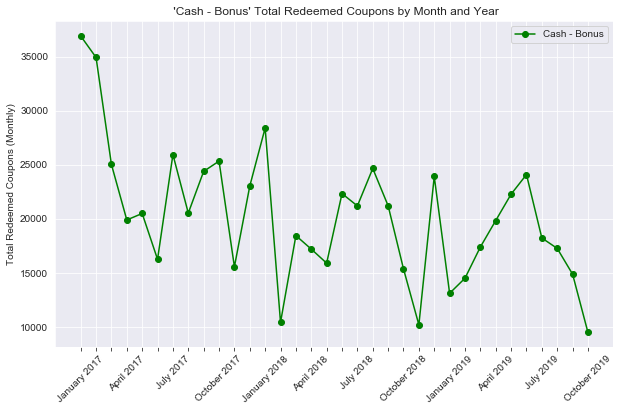

In [75]:
### Reset seaborn to the default background - for better viewing
sns.set_style("darkgrid")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (10, 6))

## Plot the first three type / subtype combinations
plt.plot(x, y1, 'g-o', label = "Cash - Bonus")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Loop through the labels and only show every 4 months for easier readability
## Set a descriptive title

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Cash - Bonus' Total Redeemed Coupons by Month and Year")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

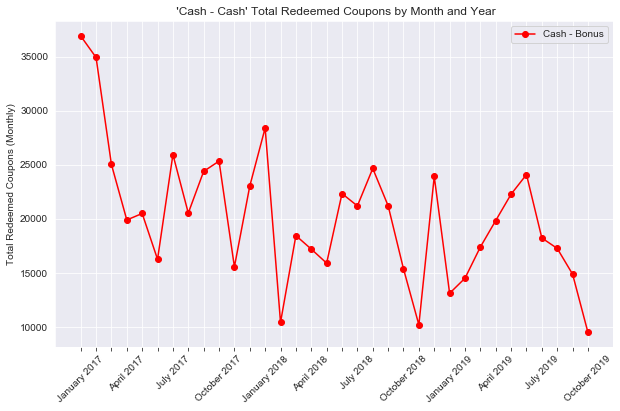

In [76]:
### Reset seaborn to the default background - for better viewing
sns.set_style("darkgrid")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (10, 6))

## Plot the first three type / subtype combinations
plt.plot(x, y1, 'r-o', label = "Cash - Bonus")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Loop through the labels and only show every 4 months for easier readability
## Set a descriptive title

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Cash - Cash' Total Redeemed Coupons by Month and Year")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

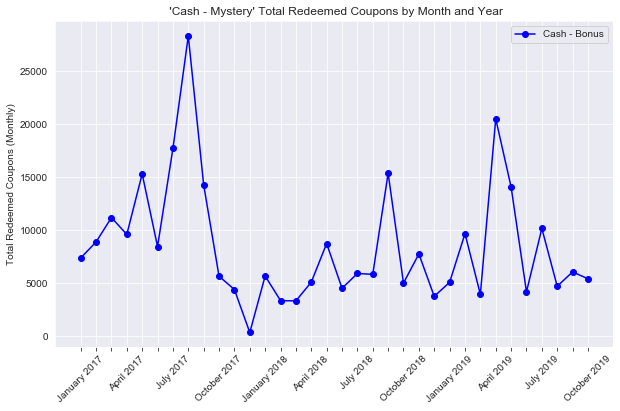

In [77]:
### Reset seaborn to the default background - for better viewing
sns.set_style("darkgrid")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (10, 6))

## Plot the first three type / subtype combinations
plt.plot(x, y3, 'b-o', label = "Cash - Bonus")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Loop through the labels and only show every 4 months for easier readability
## Set a descriptive title

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Cash - Mystery' Total Redeemed Coupons by Month and Year")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

## What to make of this?  We see that cash rewards tend to follow the same pattern, and had a huge spike in redemptions starting in early 2017 and then coming right back down towards the end of the year.  However, none of those rewards reach the same level of activity again - what caused them to be so popular during that timeframe?

## Generate the next set of plots:

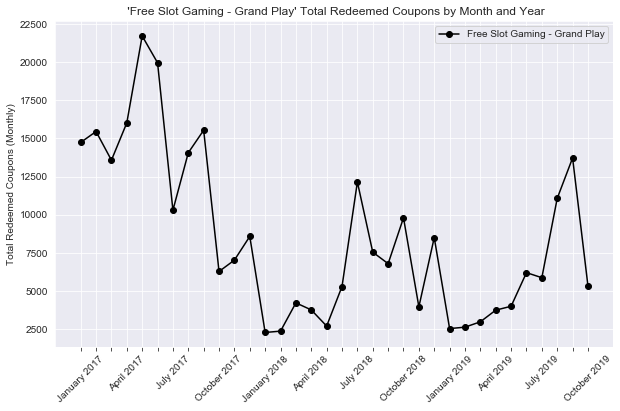

In [78]:
### Reset seaborn to the default background - for better viewing
sns.set_style("darkgrid")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (10, 6))

## Plot the first three type / subtype combinations
plt.plot(x, y4, 'k-o', label = "Free Slot Gaming - Grand Play")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Loop through the labels and only show every 4 months for easier readability
## Set a descriptive title

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Free Slot Gaming - Grand Play' Total Redeemed Coupons by Month and Year")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

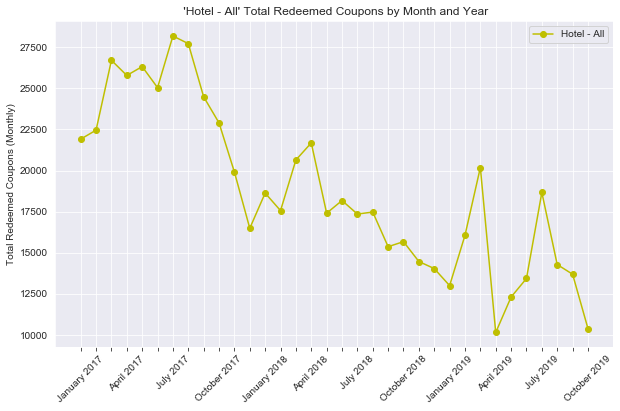

In [79]:
### Reset seaborn to the default background - for better viewing
sns.set_style("darkgrid")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (10, 6))

## Plot the first three type / subtype combinations
plt.plot(x, y5, 'y-o', label = "Hotel - All")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Loop through the labels and only show every 4 months for easier readability
## Set a descriptive title

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Hotel - All' Total Redeemed Coupons by Month and Year")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

## Similar activity for the other two type/subtype combinations... Increased usage throughout the first year but then it starts to drop dramatically.  Curious to see if this is not the case for all promotions, however.

In [66]:
## Add in casino information to see if there is a difference between the two

top_five_location_coupon_pivot_table = \
        pd.pivot_table(top_five_coupon_combinations, values = "Redemption Count", index = ["Month", "Year", "Casino Site"],
                            columns = ["Coupon Type / Subtype"], aggfunc = np.sum).reset_index()

In [67]:
top_five_location_coupon_pivot_table["Month (name)"] = \
        top_five_location_coupon_pivot_table["Month"].apply(lambda x: calendar.month_name[x])

## Combine month and year, then sort the table by year/month
top_five_location_coupon_pivot_table["Month & Year"] = top_five_location_coupon_pivot_table["Month (name)"] + " " + \
            top_five_location_coupon_pivot_table["Year"].astype(str)

## Sort the values by calendar year - and we should be done!
top_five_location_coupon_pivot_table.sort_values(by = ["Year", "Month"], inplace = True)

In [68]:
top_five_casino_1 = \
        top_five_location_coupon_pivot_table[top_five_location_coupon_pivot_table["Casino Site"] == 1]

In [69]:
## Create a quick function to put all of the columns we want to plot into variables

## Separate each coupon type/subtype combination

casino_1_y1 = top_five_casino_1["Cash - Bonus"]
casino_1_y2 = top_five_casino_1["Cash - Cash"]
casino_1_y3 = top_five_casino_1["Cash - Mystery"]
casino_1_y4 = top_five_casino_1["Free Slot Gaming - Grand Play"]
casino_1_y5 = top_five_casino_1["Hotel - All"]

## Use the month and year for our x-axis
casino_1_x = top_five_casino_1["Month & Year"]

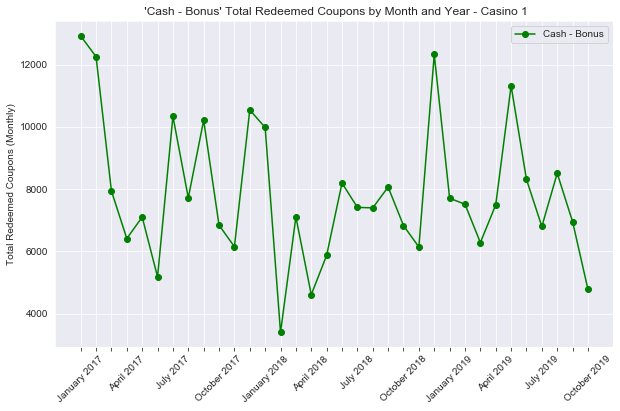

In [81]:
### Reset seaborn to the default background - for better viewing
sns.set_style("darkgrid")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (10, 6))

## Plot the first three type / subtype combinations
plt.plot(casino_1_x, casino_1_y1, 'g-o', label = "Cash - Bonus")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Loop through the labels and only show every 4 months for easier readability
## Set a descriptive title

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Cash - Bonus' Total Redeemed Coupons by Month and Year - Casino 1")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

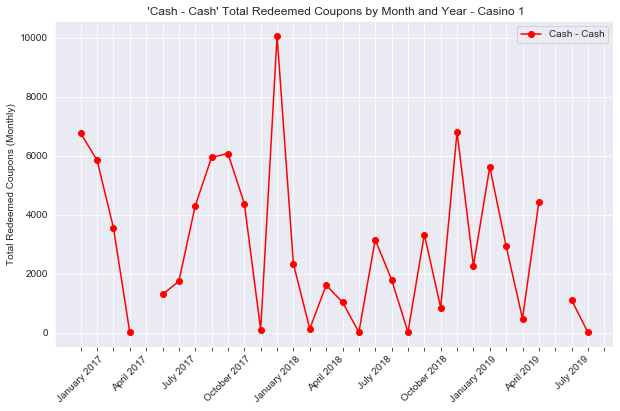

In [83]:
### Reset seaborn to the default background - for better viewing
sns.set_style("darkgrid")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (10, 6))

## Plot the first three type / subtype combinations
plt.plot(casino_1_x, casino_1_y2, 'r-o', label = "Cash - Cash")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Loop through the labels and only show every 4 months for easier readability
## Set a descriptive title

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Cash - Cash' Total Redeemed Coupons by Month and Year - Casino 1")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

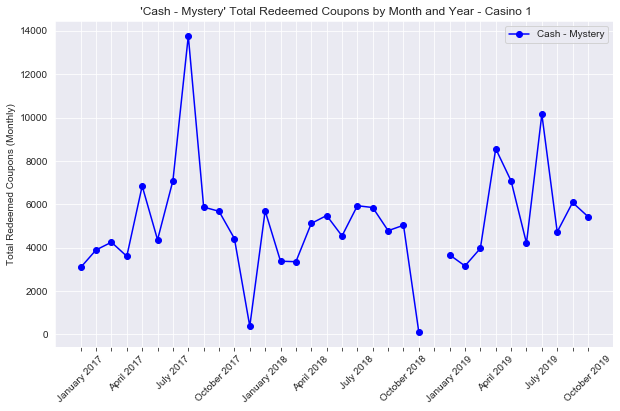

In [84]:
### Reset seaborn to the default background - for better viewing
sns.set_style("darkgrid")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (10, 6))

## Plot the first three type / subtype combinations
plt.plot(casino_1_x, casino_1_y3, 'b-o', label = "Cash - Mystery")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Loop through the labels and only show every 4 months for easier readability
## Set a descriptive title

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Cash - Mystery' Total Redeemed Coupons by Month and Year - Casino 1")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

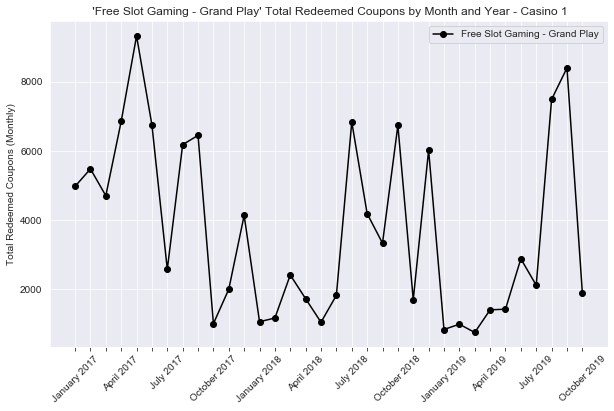

In [86]:
### Reset seaborn to the default background - for better viewing
sns.set_style("darkgrid")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (10, 6))

## Plot the first three type / subtype combinations
plt.plot(casino_1_x, casino_1_y4, 'k-o', label = "Free Slot Gaming - Grand Play")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Loop through the labels and only show every 4 months for easier readability
## Set a descriptive title

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Free Slot Gaming - Grand Play' Total Redeemed Coupons by Month and Year - Casino 1")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

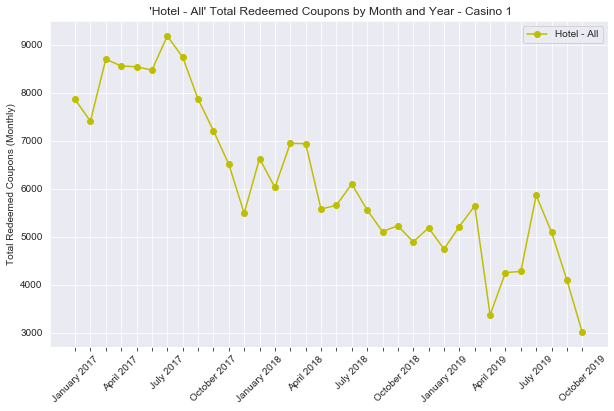

In [88]:
### Reset seaborn to the default background - for better viewing
sns.set_style("darkgrid")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (10, 6))

## Plot the first three type / subtype combinations
plt.plot(casino_1_x, casino_1_y5, 'y-o', label = "Hotel - All")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Loop through the labels and only show every 4 months for easier readability
## Set a descriptive title

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Hotel - All' Total Redeemed Coupons by Month and Year - Casino 1")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

In [89]:
top_five_casino_2 = \
        top_five_location_coupon_pivot_table[top_five_location_coupon_pivot_table["Casino Site"] == 2]

In [90]:
## Create a quick function to put all of the columns we want to plot into variables

## Separate each coupon type/subtype combination

casino_2_y1 = top_five_casino_2["Cash - Bonus"]
casino_2_y2 = top_five_casino_2["Cash - Cash"]
casino_2_y3 = top_five_casino_2["Cash - Mystery"]
casino_2_y4 = top_five_casino_2["Free Slot Gaming - Grand Play"]
casino_2_y5 = top_five_casino_2["Hotel - All"]

## Use the month and year for our x-axis
casino_2_x = top_five_casino_2["Month & Year"]

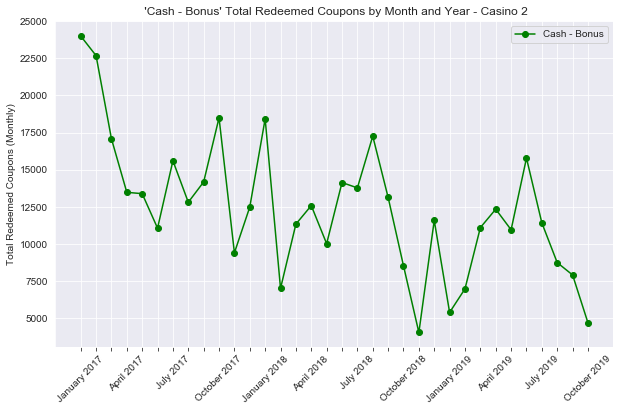

In [91]:
### Reset seaborn to the default background - for better viewing
sns.set_style("darkgrid")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (10, 6))

## Plot the first three type / subtype combinations
plt.plot(casino_2_x, casino_2_y1, 'g-o', label = "Cash - Bonus")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Loop through the labels and only show every 4 months for easier readability
## Set a descriptive title

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Cash - Bonus' Total Redeemed Coupons by Month and Year - Casino 2")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

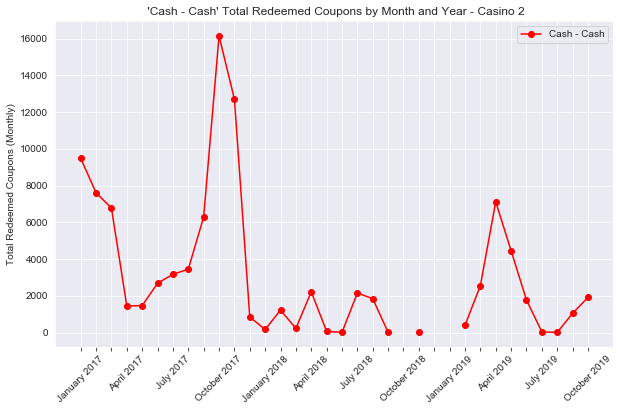

In [92]:
### Reset seaborn to the default background - for better viewing
sns.set_style("darkgrid")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (10, 6))

## Plot the first three type / subtype combinations
plt.plot(casino_2_x, casino_2_y2, 'r-o', label = "Cash - Cash")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Loop through the labels and only show every 4 months for easier readability
## Set a descriptive title

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Cash - Cash' Total Redeemed Coupons by Month and Year - Casino 2")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

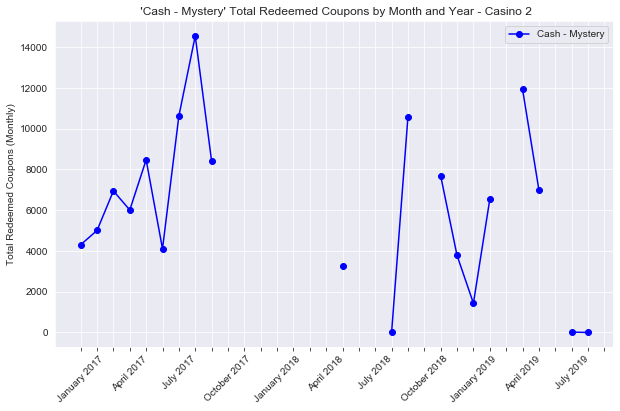

In [93]:
### Reset seaborn to the default background - for better viewing
sns.set_style("darkgrid")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (10, 6))

## Plot the first three type / subtype combinations
plt.plot(casino_2_x, casino_2_y3, 'b-o', label = "Cash - Mystery")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Loop through the labels and only show every 4 months for easier readability
## Set a descriptive title

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Cash - Mystery' Total Redeemed Coupons by Month and Year - Casino 2")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

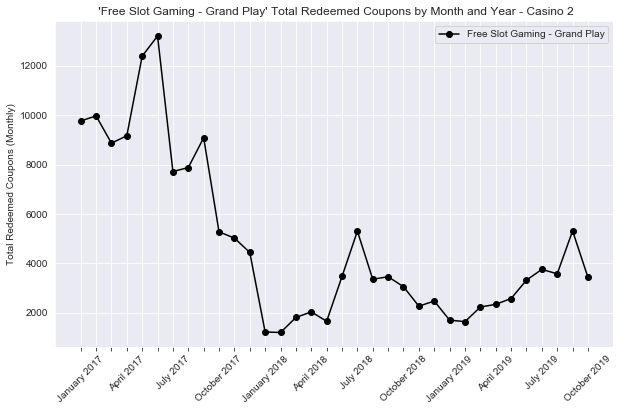

In [94]:
### Reset seaborn to the default background - for better viewing
sns.set_style("darkgrid")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (10, 6))

## Plot the first three type / subtype combinations
plt.plot(casino_2_x, casino_2_y4, 'k-o', label = "Free Slot Gaming - Grand Play")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Loop through the labels and only show every 4 months for easier readability
## Set a descriptive title

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Free Slot Gaming - Grand Play' Total Redeemed Coupons by Month and Year - Casino 2")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

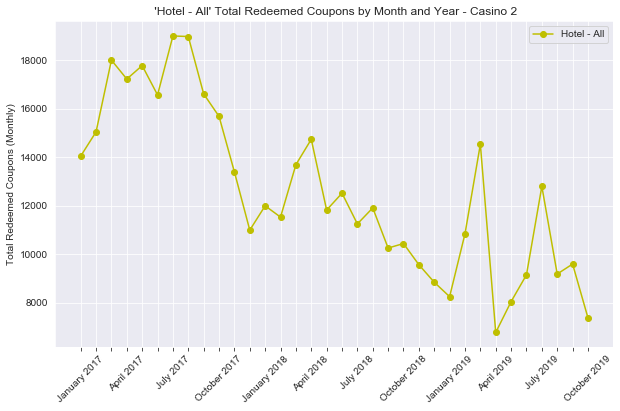

In [95]:
### Reset seaborn to the default background - for better viewing
sns.set_style("darkgrid")

## Plot scores on each epoch of our first model

plt.figure(1, figsize = (10, 6))

## Plot the first three type / subtype combinations
plt.plot(casino_2_x, casino_2_y5, 'y-o', label = "Hotel - All")

## Change the y-label for better desriptive text
## Set legend for first plot  
## Loop through the labels and only show every 4 months for easier readability
## Set a descriptive title

plt.ylabel("Total Redeemed Coupons (Monthly)")
plt.title(" 'Hotel - All' Total Redeemed Coupons by Month and Year - Casino 2")
plt.legend()

ax = plt.gca()

every_nth = 3
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_rotation(45)
    if n % every_nth != 0:
        label.set_visible(False)
ax.tick_params(bottom = True)

## Show the graph!
plt.show()

## Now we're going to do something really cool - we're going to swap over to R to try an association rules analysis

In [1]:
## Bring in the libraries we need for the analysis

library(tidyr)
library(ggplot2)
library(dplyr)
library(arules)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: Matrix

Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Attaching package: 'arules'

The following object is masked from 'package:dplyr':

    recode

The following objects are masked from 'package:base':

    abbreviate, write



In [2]:
## Set the directory to load the data file - the fact table

data.dir = "D:/Group Folder/Datasets/"

## Set the file name

data.file = "FactCouponRedeem.csv"

In [3]:
## Create a look up to the CSV file

coupon_fact_table = paste(data.dir, data.file, sep = "")

In [4]:
## Read in the fact table

suppressWarnings(suppressMessages(coupon_fact_df <- readr::read_csv(file = coupon_fact_table)))

In [5]:
## Confirm we loaded in ever row to the table

nrow(coupon_fact_df)

[1] 2777358

In [6]:
## Attach the df to R so we don't have to load it into memory everytime

attach(coupon_fact_df)

In [7]:
names(coupon_fact_df)

[1] "CouponID"           "Description"        "PlayerID"          
 [4] "AccountingDate"     "RedeemValue"        "RedeemCount"       
 [7] "SiteID"             "RedemptionNumber"   "ValidMonth"        
[10] "ValidYear"          "TypeCategory"       "TypeDescription"   
[13] "SubType"            "SubTypeDescription" "TargetPopKey"      
[16] "TargetPop"          "ProgramTypeKey"     "ProgramType"

## Carve out the columns that we require for the association rules analysis

- CouponID
- Month
- Year
- SiteID
- TargetPop
- ProgramType
- TypeDescription
- SubtypeDescription
- RedeemValue
- RedeemCount

In [8]:
columns_required <- c("CouponID", "PlayerID", "ValidMonth", "ValidYear", "SiteID", "TargetPop", "ProgramType",
                      "TypeDescription", "SubTypeDescription", "RedeemValue", 
                     "RedeemCount")

In [9]:
## Subset the dataframe to only the columns we care about
## We label it a transaction table since each couponID getting redeemed counts as a transcation

transaction_table <- coupon_fact_df[, columns_required]

In [10]:
## Show the structure of the "transaction" table

head(transaction_table, 20)

CouponID,PlayerID,ValidMonth,ValidYear,SiteID,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,RedeemCount
89729,530342410,12,16,1,VIP,Not Applicable,Hotel,ML,29,1
89729,710328524,12,16,1,VIP,Not Applicable,Hotel,ML,29,1
89093,1000600137,10,16,2,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,5,1
89729,710004002,12,16,1,VIP,Not Applicable,Hotel,ML,29,1
4,1000681589,4,7,2,New Member,Not Applicable,Other,Other,0,1
71400,1000681589,4,14,2,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,10,1
71396,1000681589,4,14,2,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,10,1
85239,1000681589,4,16,2,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,5,1
89729,530114875,12,16,1,VIP,Not Applicable,Hotel,ML,29,1
89729,530181290,12,16,1,VIP,Not Applicable,Hotel,ML,29,1


In [11]:
## Filter the table a little more

transaction_table_filtered <-
        transaction_table %>%
                filter(RedeemCount != 0) ## Remove any rows that have a zero redeem count

In [12]:
## Matching our row count from the first set of analyses in Python

nrow(transaction_table_filtered)

[1] 2777131

In [13]:
## Create a unique identifier for every redeemed coupon by combining the coupon id and playerid
## This should allow us to differentiate between different "transactions"

transaction_table_filtered$TransactionID <-
        paste(transaction_table_filtered$CouponID, transaction_table_filtered$PlayerID)

In [14]:
## Subset the transcation table into Casino 1 and Casino 2 - likely differences between the two

casino_1_df <- 
        transaction_table_filtered %>%
                filter(SiteID == 1)

casino_2_df <- 
        transaction_table_filtered %>%
                filter(SiteID == 2)

In [15]:
## Show the row counts for the new tables

nrow(casino_1_df)

nrow(casino_2_df)

[1] 1171888

[1] 1605243

In [16]:
## Show the top 6 rows to see how the dataframe structure has changed

head(casino_1_df)

CouponID,PlayerID,ValidMonth,ValidYear,SiteID,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,RedeemCount,TransactionID
89729,530342410,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 530342410
89729,710328524,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 710328524
89729,710004002,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 710004002
89729,530114875,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 530114875
89729,530181290,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 530181290
89729,530315284,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 530315284


In [17]:
## Move the transactionID to the first column in the dataframe
## Remove SiteID since we don't really require it for this analysis

casino_1_df <- casino_1_df %>%
                    select(TransactionID, everything(), -SiteID)

In [18]:
## Look at a certain subsection of the data, that we will use to generate the Association rules

head(casino_1_df[, 4:10])

ValidMonth,ValidYear,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue
12,16,VIP,Not Applicable,Hotel,ML,29
12,16,VIP,Not Applicable,Hotel,ML,29
12,16,VIP,Not Applicable,Hotel,ML,29
12,16,VIP,Not Applicable,Hotel,ML,29
12,16,VIP,Not Applicable,Hotel,ML,29
12,16,VIP,Not Applicable,Hotel,ML,29


In [19]:
####### Arules library requires a significant transformation before it can be fed in
#### We'll try this with one table first

trans_id <- as.character(casino_1_df[["TransactionID"]])
casino_1_df <- casino_1_df[, 4:10]

for (i in 1:ncol(casino_1_df)) casino_1_df[[i]] <- as.factor(casino_1_df[[i]])

trans <- as(casino_1_df, "transactions")

transactionInfo(trans)[["transactionID"]] <- trans_id

In [20]:
## Confirm the rules generated successfully

head(trans)

transactions in sparse format with
 6 transactions (rows) and
 414 items (columns)

In [21]:
## Use the apriori function to generate a set of rules based on the "transactions"
## we created above.  We just want to see if there's anything that could of worthwhile interest
## from mining the coupon redemptions

casino_1_rules <- apriori(trans, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 234377 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[414 item(s), 1171888 transaction(s)] done [0.65s].
sorting and recoding items ... [8 item(s)] done [0.05s].
creating transaction tree ... done [0.54s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [36 rule(s)] done [0.00s].
creating S4 object  ... done [0.15s].


In [22]:
casino_1_arules_df <- DATAFRAME(casino_1_rules)

In [23]:
## Re-order the dataframe by lift

casino_1_arules_df <- casino_1_arules_df %>%
                            arrange(desc(lift))

In [24]:
## Show the first 20 rows of the dataframe

head(casino_1_arules_df, 20)

LHS,RHS,support,confidence,lift,count
"{ProgramType=Not Applicable,TypeDescription=Cash}",{SubTypeDescription=Bonus},0.2275516,0.5068048,2.080282,266665
"{TargetPop=Not Applicable,TypeDescription=Cash}",{SubTypeDescription=Bonus},0.2102803,0.5067939,2.080237,246425
"{TargetPop=Not Applicable,ProgramType=Not Applicable,TypeDescription=Cash}",{SubTypeDescription=Bonus},0.2102803,0.5067939,2.080237,246425
{SubTypeDescription=Bonus},{TypeDescription=Cash},0.2275610,0.9340698,2.080135,266676
{TypeDescription=Cash},{SubTypeDescription=Bonus},0.2275610,0.5067689,2.080135,266676
"{ProgramType=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2275516,0.9340673,2.080129,266665
"{TargetPop=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2102803,0.9290362,2.068925,246425
"{TargetPop=Not Applicable,ProgramType=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2102803,0.9290362,2.068925,246425
"{ValidYear=17,ProgramType=Not Applicable}",{TargetPop=Not Applicable},0.3318722,0.9472357,1.236860,388917
"{ProgramType=Not Applicable,SubTypeDescription=Bonus}",{TargetPop=Not Applicable},0.2263424,0.9291039,1.213184,265248


## Our association rules dataframe does not give us much information for Casino 1.  Much of the data is "Not Applicable" so that doesn't leave us much to work with.

## We can run the same analysis on Casino 2 and determine if there is any useful information in there.

In [25]:
## Move the transactionID to the first column in the dataframe
## Remove SiteID since we don't really require it for this analysis

casino_2_df <- casino_2_df %>%
                    select(TransactionID, everything(), -SiteID)

In [26]:
## Look at a certain subsection of the data, that we will use to generate the Association rules

head(casino_2_df[, 4:10])

ValidMonth,ValidYear,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue
10,16,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,5
4,7,New Member,Not Applicable,Other,Other,0
4,14,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,10
4,14,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,10
4,16,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,5
1,17,VIP,Not Applicable,Hotel,HK,29


In [27]:
####### Arules library requires a significant transformation before it can be fed in
#### We'll try this with one table first

trans_id_2 <- as.character(casino_2_df[["TransactionID"]])
casino_2_df <- casino_2_df[, 4:10]

for (i in 1:ncol(casino_2_df)) casino_2_df[[i]] <- as.factor(casino_2_df[[i]])

trans_2 <- as(casino_2_df, "transactions")

transactionInfo(trans_2)[["transactionID"]] <- trans_id_2

In [28]:
## Confirm the rules generated successfully

head(trans_2)

transactions in sparse format with
 6 transactions (rows) and
 383 items (columns)

In [29]:
## Use the apriori function to generate a set of rules based on the "transactions"
## we created above.  We just want to see if there's anything that could of worthwhile interest
## from mining the coupon redemptions

casino_2_rules <- apriori(trans_2, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 321048 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[383 item(s), 1605243 transaction(s)] done [0.90s].
sorting and recoding items ... [12 item(s)] done [0.07s].
creating transaction tree ... done [1.01s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [24 rule(s)] done [0.00s].
creating S4 object  ... done [0.20s].


In [30]:
## Convert our completed rules into a dataframe

casino_2_arules_df <- DATAFRAME(casino_2_rules)

In [31]:
## Re-order the dataframe by lift

casino_2_arules_df %>%
        arrange(desc(lift))

LHS,RHS,support,confidence,lift,count
"{TargetPop=Loyalty,TypeDescription=Hotel}",{ProgramType=Gazette},0.2073462,0.9747555,4.701017,332841
"{ProgramType=Gazette,TypeDescription=Hotel}",{TargetPop=Loyalty},0.2073462,1.0000000,4.602834,332841
"{TypeDescription=Hotel,RedeemValue=29}",{SubTypeDescription=All},0.2296836,0.8232696,3.083255,368698
"{TypeDescription=Hotel,SubTypeDescription=All}",{RedeemValue=29},0.2296836,0.8601958,3.068169,368698
"{SubTypeDescription=All,RedeemValue=29}",{TypeDescription=Hotel},0.2296836,1.0000000,2.834596,368698
"{TargetPop=Loyalty,ProgramType=Gazette}",{TypeDescription=Hotel},0.2073462,0.9999820,2.834545,332841
"{ProgramType=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2601002,0.9679965,2.420022,417524
"{TargetPop=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2507159,0.9668384,2.417127,402460
"{TargetPop=Not Applicable,ProgramType=Not Applicable,SubTypeDescription=Bonus}",{TypeDescription=Cash},0.2507159,0.9668384,2.417127,402460
"{ProgramType=Not Applicable,TypeDescription=Cash}",{SubTypeDescription=Bonus},0.2601002,0.6552984,2.412789,417524


## Support: how often does these items appear together?
- count of itemsets (X, Y) / all transactions containing (X, Y)

## Confidence (strength of association): given my LHS, how often do we see our RHS?
- P(Y | X)

## Lift (co-occurence vs pure chance): how often do I see LHS with RHS, compared to pure chance or coincidence?
- supp(X -> Y) / s(X) * s(Y)

In [32]:
## Set up player file

player.file = "PlayerDay.csv"

## Set up player day table

player_day_table = paste(data.dir, player.file, sep = "")

In [33]:
## Read in the player day table

suppressWarnings(suppressMessages(player_day_df <- readr::read_csv(file = player_day_table)))

In [34]:
## Confirm we loaded in ever row to the table

nrow(player_day_df)

[1] 7292910

In [35]:
## Attach the df to R so we don't have to load it into memory everytime

attach(player_day_df)

The following objects are masked from coupon_fact_df:

    PlayerID, SiteID



In [36]:
## Show the available columns

names(player_day_df)

[1] "SiteID"                 "PlayerID"               "Date_Value"            
 [4] "TtlBet"                 "Theo"                   "Actual"                
 [7] "Comp"                   "MktedCouponsRedemption" "KioskRedemptions"      
[10] "PointsToCash"           "XCUsed"                 "GamingDays"            
[13] "CoinIn"                 "SlotAct"                "SlotTheo"              
[16] "TableBet"               "TableAct"               "TableTheo"             
[19] "Slot_CompEarned"        "Slot_PointsEarned"      "Table_CompEarned"      
[22] "Table_PointsEarned"     "Days"                   "NonGamingPointsEarned" 
[25] "NonGamingCompEarned"    "ADT"                    "ADW"                   
[28] "TierID"                 "TierName"

In [37]:
## Generate some summary statistics

summary(player_day_df)

     SiteID         PlayerID           Date_Value                 
 Min.   :1.000   Min.   :3.300e+01   Min.   :2016-11-01 00:00:00  
 1st Qu.:1.000   1st Qu.:5.304e+08   1st Qu.:2017-07-15 00:00:00  
 Median :2.000   Median :7.103e+08   Median :2018-04-19 00:00:00  
 Mean   :1.577   Mean   :7.118e+08   Mean   :2018-04-22 16:18:02  
 3rd Qu.:2.000   3rd Qu.:1.000e+09   3rd Qu.:2019-01-30 00:00:00  
 Max.   :2.000   Max.   :1.001e+09   Max.   :2019-10-31 00:00:00  
                                                                  
     TtlBet             Theo               Actual                Comp          
 Min.   :      0   Min.   :     0.00   Min.   :-297120.03   Min.   :-1265.970  
 1st Qu.:     87   1st Qu.:     6.67   1st Qu.:      0.00   1st Qu.:    0.000  
 Median :    446   Median :    34.18   Median :     31.41   Median :    0.000  
 Mean   :   1407   Mean   :    93.17   Mean   :     81.12   Mean   :    3.263  
 3rd Qu.:   1324   3rd Qu.:    99.12   3rd Qu.:    145.00   3rd 

In [ ]:
player_columns <- c("PlayerID", "ADW", "ADT", "MktedCouponsRedemption", "TierName")

player_tier_df <- player_day_df[player_columns]

In [38]:
player_columns <- c("PlayerID", "TierName")

player_tier_df <- player_day_df[player_columns]

In [39]:
nrow(player_tier_df)

[1] 7292910

In [40]:
player_tier_df_no_dupes <-
         player_tier_df %>%
                distinct(PlayerID, TierName)

In [41]:
## Bring in tier information

head(player_tier_df_no_dupes)

PlayerID,TierName
1000382937,Preferred
530533484,Preferred
530086340,Silver
710028836,Preferred
1000611579,Silver
710015699,Silver


In [42]:
## Create a new table and include the tier information from the de-duplicated PlayerDay table
## Now we overwrote the old file, but leave the test output to confirm the test was successful

transaction_table_filtered <- 
        left_join(transaction_table_filtered, player_tier_df_no_dupes, by = "PlayerID") 

In [43]:
## Success!  We will overwrite the old DF with the new one including Tier information

head(transaction_table_filtered)

CouponID,PlayerID,ValidMonth,ValidYear,SiteID,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,RedeemCount,TransactionID,TierName
89729,530342410,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 530342410,Diamond
89729,710328524,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 710328524,Silver
89093,1000600137,10,16,2,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,5,1,89093 1000600137,Preferred
89729,710004002,12,16,1,VIP,Not Applicable,Hotel,ML,29,1,89729 710004002,Silver
4,1000681589,4,7,2,New Member,Not Applicable,Other,Other,0,1,4 1000681589,Preferred
71400,1000681589,4,14,2,Not Applicable,Not Applicable,Free Slot Gaming,Grand Play,10,1,71400 1000681589,Preferred


In [69]:
## Remove the rows with Not Applicable to generate the correct set of rules

transaction_table_filtered <- 
        transaction_table_filtered %>%
            filter(ProgramType != "Not Applicable")

In [70]:
## Confirm lower row count

nrow(transaction_table_filtered)

[1] 517888

In [71]:
## Create a unique identifier for every redeemed coupon by combining the coupon id and playerid
## This should allow us to differentiate between different "transactions"

transaction_table_filtered$TransactionID <-
        paste(transaction_table_filtered$CouponID, transaction_table_filtered$PlayerID)

In [72]:
## Subset the transcation table into Casino 1 and Casino 2 - likely differences between the two

casino_1_df <- 
        transaction_table_filtered %>%
                filter(SiteID == 1)

casino_2_df <- 
        transaction_table_filtered %>%
                filter(SiteID == 2)

In [73]:
## Show the row counts for the new tables

nrow(casino_1_df)

nrow(casino_2_df)

[1] 167168

[1] 350720

In [74]:
## Show the top 6 rows to see how the dataframe structure has changed

head(casino_1_df)

CouponID,PlayerID,ValidMonth,ValidYear,SiteID,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,RedeemCount,TransactionID,TierName
89502,24930,1,17,1,Loyalty,Gazette,Hotel,All,29,1,89502 24930,Gold
89502,530005985,1,17,1,Loyalty,Gazette,Hotel,All,29,1,89502 530005985,Gold
89301,530086721,1,17,1,Loyalty,Gazette,Cash,Cash,25,1,89301 530086721,Diamond
89502,530517544,1,17,1,Loyalty,Gazette,Hotel,All,29,1,89502 530517544,Silver
89503,530517544,1,17,1,Loyalty,Gazette,Hotel,All,29,1,89503 530517544,Silver
89301,530483440,1,17,1,Loyalty,Gazette,Cash,Cash,25,1,89301 530483440,Diamond


In [75]:
## Move the transactionID to the first column in the dataframe
## Remove SiteID since we don't really require it for this analysis

casino_1_df <- casino_1_df %>%
                    select(TransactionID, everything(), -SiteID)

In [76]:
## Move the transactionID to the first column in the dataframe
## Remove RedeemCount since we don't really require it for this analysis
## And bring in Tier!

casino_1_df <- casino_1_df %>%
                    select(TransactionID, everything(), -RedeemCount)

In [77]:
## Look at a certain subsection of the data, that we will use to generate the Association rules

head(casino_1_df[, 4:11])

ValidMonth,ValidYear,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,TierName
1,17,Loyalty,Gazette,Hotel,All,29,Gold
1,17,Loyalty,Gazette,Hotel,All,29,Gold
1,17,Loyalty,Gazette,Cash,Cash,25,Diamond
1,17,Loyalty,Gazette,Hotel,All,29,Silver
1,17,Loyalty,Gazette,Hotel,All,29,Silver
1,17,Loyalty,Gazette,Cash,Cash,25,Diamond


In [78]:
####### Arules library requires a significant transformation before it can be fed in
#### We'll try this with one table first

trans_id <- as.character(casino_1_df[["TransactionID"]])
casino_1_df <- casino_1_df[, 4:11]

for (i in 1:ncol(casino_1_df)) casino_1_df[[i]] <- as.factor(casino_1_df[[i]])

trans <- as(casino_1_df, "transactions")

transactionInfo(trans)[["transactionID"]] <- trans_id

In [79]:
## Confirm the rules generated successfully

head(trans)

transactions in sparse format with
 6 transactions (rows) and
 72 items (columns)

In [80]:
## Use the apriori function to generate a set of rules based on the "transactions"
## we created above.  We just want to see if there's anything that could of worthwhile interest
## from mining the coupon redemptions

casino_1_rules <- apriori(trans, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 33433 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[72 item(s), 167168 transaction(s)] done [0.09s].
sorting and recoding items ... [11 item(s)] done [0.01s].
creating transaction tree ... done [0.06s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [431 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [81]:
casino_1_arules_df <- DATAFRAME(casino_1_rules)

In [82]:
## Re-order the dataframe by lift

casino_1_arules_df <- casino_1_arules_df %>%
                            arrange(desc(lift))

In [83]:
## Show the first 20 rows of the dataframe

head(casino_1_arules_df, 20)

LHS,RHS,support,confidence,lift,count
"{SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2614496,0.9398331,1.147274,43706
"{TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2614496,0.9398331,1.147274,43706
"{TargetPop=Loyalty,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2613718,0.9398163,1.147254,43693
"{TargetPop=Loyalty,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2613718,0.9398163,1.147254,43693
"{ProgramType=Gazette,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2607556,0.9396827,1.147091,43590
"{TargetPop=Loyalty,ProgramType=Gazette,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2607556,0.9396827,1.147091,43590
"{ProgramType=Gazette,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2607556,0.9396827,1.147091,43590
"{TargetPop=Loyalty,ProgramType=Gazette,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2607556,0.9396827,1.147091,43590
"{TargetPop=Loyalty,TypeDescription=Hotel,TierName=Gold}",{RedeemValue=29},0.2660677,0.9258342,1.130185,44478
"{TargetPop=Loyalty,TierName=Gold}",{RedeemValue=29},0.2660677,0.9257378,1.130068,44478


## We can run the same analysis on Casino 2 and determine if there is any useful information in there.

In [84]:
head(casino_2_df)

CouponID,PlayerID,ValidMonth,ValidYear,SiteID,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,RedeemCount,TransactionID,TierName
89502,1000019430,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 1000019430,Diamond
89502,1000301411,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 1000301411,Platinum
89502,710025187,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 710025187,Diamond
89502,710271810,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 710271810,Platinum
89502,710000644,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 710000644,Gold
89502,710327072,1,17,2,Loyalty,Gazette,Hotel,All,29,1,89502 710327072,Gold


In [85]:
## Move the transactionID to the first column in the dataframe
## Remove SiteID since we don't really require it for this analysis

casino_2_df <- casino_2_df %>%
                    select(TransactionID, everything(), -SiteID)

In [86]:
casino_2_df <- casino_2_df %>%
                    select(TransactionID, everything(), -RedeemCount)

In [87]:
## Look at a certain subsection of the data, that we will use to generate the Association rules

head(casino_2_df[, 4:11])

ValidMonth,ValidYear,TargetPop,ProgramType,TypeDescription,SubTypeDescription,RedeemValue,TierName
1,17,Loyalty,Gazette,Hotel,All,29,Diamond
1,17,Loyalty,Gazette,Hotel,All,29,Platinum
1,17,Loyalty,Gazette,Hotel,All,29,Diamond
1,17,Loyalty,Gazette,Hotel,All,29,Platinum
1,17,Loyalty,Gazette,Hotel,All,29,Gold
1,17,Loyalty,Gazette,Hotel,All,29,Gold


In [88]:
####### Arules library requires a significant transformation before it can be fed in
#### We'll try this with one table first

trans_id_2 <- as.character(casino_2_df[["TransactionID"]])
casino_2_df <- casino_2_df[, 4:11]

for (i in 1:ncol(casino_2_df)) casino_2_df[[i]] <- as.factor(casino_2_df[[i]])

trans_2 <- as(casino_2_df, "transactions")

transactionInfo(trans_2)[["transactionID"]] <- trans_id_2

In [89]:
## Confirm the rules generated successfully

head(trans_2)

transactions in sparse format with
 6 transactions (rows) and
 89 items (columns)

In [90]:
## Use the apriori function to generate a set of rules based on the "transactions"
## we created above.  We just want to see if there's anything that could of worthwhile interest
## from mining the coupon redemptions

casino_2_rules <- apriori(trans_2, parameter = list(supp = 0.2, 
                            conf = 0.4, target = "rules", minlen=3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.4    0.1    1 none FALSE            TRUE       5     0.2      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 70144 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[89 item(s), 350720 transaction(s)] done [0.20s].
sorting and recoding items ... [11 item(s)] done [0.01s].
creating transaction tree ... done [0.13s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [419 rule(s)] done [0.00s].
creating S4 object  ... done [0.02s].


In [91]:
## Convert our completed rules into a dataframe

casino_2_arules_df <- DATAFRAME(casino_2_rules)

In [92]:
## Re-order the dataframe by lift

casino_2_arules_df <- casino_2_arules_df %>%
                            arrange(desc(lift))

In [93]:
## Show the first 20 rows of the dataframe

head(casino_2_arules_df, 20)

LHS,RHS,support,confidence,lift,count
"{TargetPop=Loyalty,SubTypeDescription=All,RedeemValue=29}",{ValidYear=17},0.3149492,0.4078416,1.153981,110459
"{TargetPop=Loyalty,TypeDescription=Hotel,SubTypeDescription=All,RedeemValue=29}",{ValidYear=17},0.3149492,0.4078416,1.153981,110459
"{SubTypeDescription=All,RedeemValue=29}",{ValidYear=17},0.3149492,0.4065671,1.150374,110459
"{TypeDescription=Hotel,SubTypeDescription=All,RedeemValue=29}",{ValidYear=17},0.3149492,0.4065671,1.150374,110459
"{SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2404026,0.9262628,1.142433,84314
"{TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2404026,0.9262628,1.142433,84314
"{TargetPop=Loyalty,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2403085,0.9262361,1.142400,84281
"{TargetPop=Loyalty,TypeDescription=Hotel,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2403085,0.9262361,1.142400,84281
"{ProgramType=Gazette,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2395957,0.9260431,1.142162,84031
"{TargetPop=Loyalty,ProgramType=Gazette,SubTypeDescription=All,TierName=Gold}",{RedeemValue=29},0.2395957,0.9260431,1.142162,84031


## And voila!  We have a new set of association rules with tier information included.  What other information could we dig into?

In [94]:
player_columns <- c("PlayerID", "ADW", "ADT", "MktedCouponsRedemption", "TierName")

player_adw_df <- player_day_df[player_columns]

In [95]:
head(player_adw_df)

PlayerID,ADW,ADT,MktedCouponsRedemption,TierName
1000382937,30.7840,30.7840,0.01,Preferred
530533484,242.0050,242.0050,0.00,Preferred
530086340,47.8733,47.8733,0.00,Silver
710028836,6.3400,6.3400,0.00,Preferred
1000611579,89.5913,89.5912,0.00,Silver
710015699,39.0652,39.0652,0.00,Silver


In [99]:
player_total_adw_dt_df <-
        player_adw_df %>%
            group_by(PlayerID) %>%
        summarise(Total_ADW = sum(ADW), Total_ADT = sum(ADT),Total_MktedCouponsRedemption = sum(MktedCouponsRedemption)) %>%
            arrange(desc(Total_ADW))

In [100]:
head(player_total_adw_dt_df, 20)

PlayerID,Total_ADW,Total_ADT,Total_MktedCouponsRedemption
530019390,746112.86,738900.95,804.53
1000745227,277135.97,275860.50,5414.11
1000708821,256534.05,256534.04,4999.01
1000652038,204304.50,204304.46,12236.17
1000691524,154977.17,154977.16,13990.72
1000614707,145726.97,145723.64,10537.57
1000377098,143052.41,143052.40,5543.26
530302370,138761.40,138761.40,2413.24
710540598,131724.05,131715.08,11973.12
530442261,131363.86,131341.50,10410.56


## The top twenty players in total ADW and ADT, vs. how much in marketed coupons they redeemed.

## Now we shift back to Python to do some additional analysis

In [16]:
## Look at our original fact table again, to help determine what fields are available for analysis

redeemed_coupon_df.head()

,CouponID,Description,PlayerID,AccountingDate,RedeemValue,RedeemCount,SiteID,RedemptionNumber,ValidMonth,ValidYear,...,TypeDescription,SubType,SubTypeDescription,TargetPopKey,TargetPop,ProgramTypeKey,ProgramType,Date,Month,Year
0,89729,M1216VHNY- VIP NYE HTL,530342410,2017-01-01,29.0,1,1,NaN,12,16,...,Hotel,a,ML,a,VIP,N,Not Applicable,2017-01-01,1,2017
1,89729,M1216VHNY- VIP NYE HTL,710328524,2017-01-01,29.0,1,1,NaN,12,16,...,Hotel,a,ML,a,VIP,N,Not Applicable,2017-01-01,1,2017
2,89093,C1016OGDO1E-Decline GP WKND 5,1000600137,2017-01-01,5.0,1,2,NaN,10,16,...,Free Slot Gaming,a,Grand Play,N,Not Applicable,N,Not Applicable,2017-01-01,1,2017
3,89729,M1216VHNY- VIP NYE HTL,710004002,2017-01-01,29.0,1,1,NaN,12,16,...,Hotel,a,ML,a,VIP,N,Not Applicable,2017-01-01,1,2017
4,4,HNEW MEMBER TRACKING,1000681589,2017-01-01,0.0,1,2,NaN,4,7,...,Other,O,Other,c,New Member,N,Not Applicable,2017-01-01,1,2017


In [17]:
## Let's see what values we have for the "TargetPop" field in the fact table

redeemed_coupon_df["TargetPop"].unique()

array(['VIP', 'Not Applicable', 'New Member', 'Loyalty', 'Inactive',
       'Appointment Marketing', 'Retail'], dtype=object)

In [32]:
## Now we just group by the Target Population to get counts of redemptions
## We don't save it as a variable because it's just a quick table to take a look
## Right off the bat we notice that 

redeemed_coupon_targetpop_aggregate_df = \
        redeemed_coupon_df.groupby(["TargetPop"]) \
            .agg({"RedeemCount": ["sum"]}).reset_index() \
            .sort_values(by = ("RedeemCount", "sum"), ascending = False)

In [33]:
## Rename the columns to terms that are easier to intrepret

redeemed_coupon_targetpop_aggregate_df.columns = ["Target Population", "Total Redeemed Coupons"]

In [38]:
## Show the total number of redeemed coupons for the entire data set

total_redeemed_coupons = redeemed_coupon_df.RedeemCount.sum()

print("The total number of redeemed coupons is {}.".format(total_redeemed_coupons))

The total number of redeemed coupons is 2789901.


In [40]:
## Create a new column to show the overall % of redeemed coupons
## Vast majority of our redeemed coupons belong to a group that doesn't have a category
## And looking at these counts, there's very little information to gleam

redeemed_coupon_targetpop_aggregate_df["% of Overall Redeemed Coupons"] = \
            redeemed_coupon_targetpop_aggregate_df["Total Redeemed Coupons"] / total_redeemed_coupons * 100

In [42]:
HTML(redeemed_coupon_targetpop_aggregate_df.to_html(index=False))

Target Population,Total Redeemed Coupons,% of Overall Redeemed Coupons
Not Applicable,2008356,71.986640
Loyalty,513756,18.414847
Inactive,79069,2.834115
VIP,75767,2.715759
New Member,58283,2.089071
Appointment Marketing,54157,1.941180
Retail,513,0.018388


## We will create four new tables - by subsetting on four target populations

- Not Applicable
- Loyalty
- VIP
- New Member

In [43]:
## Create four new tables to make the analysis easier and faster
## Subset on the target populations we want to investigate further

not_applicable_target_df = redeemed_coupon_df[redeemed_coupon_df["TargetPop"] == "Not Applicable"]
loyalty_target_df = redeemed_coupon_df[redeemed_coupon_df["TargetPop"] == "Loyalty"]
vip_target_df = redeemed_coupon_df[redeemed_coupon_df["TargetPop"] == "VIP"]
new_member_target_df = redeemed_coupon_df[redeemed_coupon_df["TargetPop"] == "New Member"]

In [93]:
## Since we're going to do same manipulation four times, let's put it in a function
## When first building these set of analyses, we iterated through them to get the right format
## Once we finalized the final structure of the table, putting it in a function makes it easy to run
## on the four different tables we want to run it against

def build_target_aggregate_table(df):
    
    ## Summarize all redeemed coupons - to use in a calculation down below
    total_redeemed_coupons = redeemed_coupon_df.RedeemCount.sum()
    
    ## Rename the columns for easier readability
    target_col_names = ["Casino Location", "Coupon Type", "Coupon Sub Type","Total Redeemed Coupons"]
    
    ## Take the input dataframe, and group by the Casino Site, Coupon Type, Coupon Sub Type
    ## Summarize the RedeemCount column to get the total number of redemptions
    ## Sort the values by the summarized column in descending order
    df = \
        df.groupby(["SiteID", "TypeDescription", "SubTypeDescription"]) \
            .agg({"RedeemCount": ["sum"]}).reset_index() \
            .sort_values(by = ("RedeemCount", "sum"), ascending = False)
    
    ## Change the column names to the list above
    df.columns = target_col_names
    
    ## Create a new column showing the percentage based on the total number of redeemed coupons
    df["% of Overall Redeemed Coupons"] = \
            round(df["Total Redeemed Coupons"] / total_redeemed_coupons * 100, 2)
    
    ## Sort the dataframe again, in descending order, but also by casino location to put them together
    df.sort_values(by = ["Casino Location", "Total Redeemed Coupons"], ascending = False, inplace = True)
    
    ## Return the completed dataframe in a much nicer format
    return HTML(df.head(30).to_html(index=False))

In [94]:
build_target_aggregate_table(not_applicable_target_df)

Casino Location,Coupon Type,Coupon Sub Type,Total Redeemed Coupons,% of Overall Redeemed Coupons
2,Cash,Bonus,402460,14.43
2,Cash,Mystery,120687,4.33
2,Free Slot Gaming,Grand Play,116959,4.19
2,Hotel,HK,106635,3.82
2,Cash,Cash,97032,3.48
2,Hotel,All,90189,3.23
2,POS,Food,39858,1.43
2,Gift,Other,32318,1.16
2,Other,Other,21668,0.78
2,Points,Match Point,17871,0.64


## Here we see, for the "Not Applicable" target population and the top 30 type / subtype combinations, with most going to Cash, Free Slot Gaming, and Hotel.

In [95]:
## Show the analysis/table for Loyalty population

build_target_aggregate_table(loyalty_target_df)

Casino Location,Coupon Type,Coupon Sub Type,Total Redeemed Coupons,% of Overall Redeemed Coupons
2,Hotel,All,318619,11.42
2,Hotel,HK,20573,0.74
2,Cash,Bonus,7131,0.26
2,Hotel,ML,2266,0.08
2,Cash,Other,153,0.01
2,Hotel,Eddy's,26,0.00
2,POS,Food,5,0.00
2,Free Table Gaming,Free Play,1,0.00
1,Hotel,All,154889,5.55
1,Hotel,ML,7544,0.27


## The "Loyalty" targeted population overwhelmingly used hotel points or redeemed coupons at the hotels on site.

In [96]:
## Show the analysis/table for "VIP" population

build_target_aggregate_table(vip_target_df)

Casino Location,Coupon Type,Coupon Sub Type,Total Redeemed Coupons,% of Overall Redeemed Coupons
2,Free Slot Gaming,Grand Play,10142,0.36
2,Gift,Other,9945,0.36
2,Hotel,HK,4800,0.17
2,Points,Other,4509,0.16
2,Event,Dinner,2440,0.09
2,Hotel,All,2236,0.08
2,Cash,Cash,411,0.01
2,Event,Concert,396,0.01
2,Event,Drawing,216,0.01
2,Hotel,ML,26,0.00


## The "VIP" targeted population seemed to favor the gifts or free slot gaming.

In [97]:
## Show the analysis/table for "New Members"

build_target_aggregate_table(new_member_target_df)

Casino Location,Coupon Type,Coupon Sub Type,Total Redeemed Coupons,% of Overall Redeemed Coupons
2,Other,Other,53423,1.91
2,Free Slot Gaming,Grand Play,1783,0.06
2,Cash,Cash,1778,0.06
2,Event,Concert,124,0.00
2,POS,Food,4,0.00
1,Cash,Cash,633,0.02
1,Free Slot Gaming,Grand Play,442,0.02
1,POS,Food,63,0.00
1,Hotel,ML,31,0.00
1,Hotel,Eddy's,2,0.00


## Our "New Member" target population seems to favor "Other" coupon types, followed by "Free Slot Gaming" and "Cash".

## We're ready to move on to looking at Player attributes.  To do this, we'll bring in the Player dimension.

## We start with just the Player dim for a few reasons:

- This is the only place where we have some attributes related to the player aside from the ID.
- Bringing in the other facts or dimensions will just populate the table with missing values
- We can do an analysis over the whole population, determine what groups stand out, and then go back to the fact to get more information about them.

In [16]:
## Load in the "Player Day" table - just do it in one shot

player_dim_df = pd.read_csv(team_folder+player_dim, low_memory = False, encoding = "cp1252")

In [17]:
## Go through similar steps of looking at the overall structure of the table
## See some of the summary statistics
## Determine if any additional clean-up work is required

len(player_dim_df)

397643

In [18]:
## Look at the column names

player_dim_df.columns

Index(['PrimaryPropertyID', 'PrimaryPropertyName', 'PlayerID', 'City', 'State',
       'ZipCode', 'TierID', 'TierName', 'DistFromML', 'DistFromHK',
       'LastPlayDate', 'Description', 'BirthMonth', 'BirthYear',
       'PlayerStatus', 'Prison Flag', 'Deceased Flag', 'DMA Flag',
       'Person #  Marital Status', 'Estimated Current Home Value',
       'Children  Presence of Children 0-18',
       'DSE  Discretionary Spend Estimate', 'Est  Household Income V6',
       'PIQ Match Type', 'NCOA MOVE DATE', 'NCOA Move Type'],
      dtype='object')

In [19]:
## Observe the first five rows to see the structure of the table

player_dim_df.head()

,PrimaryPropertyID,PrimaryPropertyName,PlayerID,City,State,ZipCode,TierID,TierName,DistFromML,DistFromHK,...,Deceased Flag,DMA Flag,Person # Marital Status,Estimated Current Home Value,Children Presence of Children 0-18,DSE Discretionary Spend Estimate,Est Household Income V6,PIQ Match Type,NCOA MOVE DATE,NCOA Move Type
0,1,Grand Casino ML,33,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,No,No,Married Extremely Likely,250300,Not as Likely to have a child,17831,138,Individual Match,NaN,Did Not Move
1,1,Grand Casino ML,10014,GARFIELD,MN,56332,25,Preferred,89.0,126.0,...,No,No,Married Extremely Likely,275300,Not Likely to have a child,16028,36,Individual Match,NaN,Did Not Move
2,1,Grand Casino ML,10025,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,No,No,Unknown Scored,256800,Not Likely to have a child,27864,18,Individual Match,NaN,Did Not Move
3,1,Grand Casino ML,10063,TALMOON,MN,56637,25,Preferred,104.0,115.0,...,No,No,Married Extremely Likely,0,Not Likely to have a child,16742,49,Individual Match,NaN,Did Not Move
4,1,Grand Casino ML,10187,PEQUOT LAKES,MN,56472,25,Preferred,51.0,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Right off the bat, we notice there is no "Age" column.  So we will have to generate one ourselves.

## We can also choose to focus only on columns that are required for our population analysis.  Let's include:

- PrimaryPropertyName
- City
- State
- ZipCode
- TierName
- LastPlayDate
- BirthMonth / BirthYear
- Person #  Marital Status
- Est Household Income V6
- Children  Presence of Children 0-18
- Person #  Marital Status

In [25]:
## Since these column names aren't very descriptive, we're going to modify them too

## There's an extra space in the Est  Household Income column!  Lovely have to debug that
## Pull out on the columns we need
player_columns_to_include = \
    ["PrimaryPropertyName", "City", "State", "ZipCode", "TierName", "LastPlayDate", "BirthMonth", "BirthYear",
             "Person #  Marital Status", "Est  Household Income V6", "Children  Presence of Children 0-18",
     "Person #  Marital Status"]

new_col_names = ["Casino Site", "City", "State", "Zip Code", "Player Tier", "Last Gamble Date", "Month", "Year",
                    "Marital Status", "EstimatedHousehold Income", "No. of Dependents", "Marital Status"]

## Subset the player information based on the selected columns
player_dim_df_subset = player_dim_df[player_columns_to_include]

## Give the subsetted dataframe better/more descriptive column names
player_dim_df_subset.columns = new_col_names

In [26]:
## Show the first five rows of the new cleaned up table

player_dim_df_subset.head(5)

,Casino Site,City,State,Zip Code,Player Tier,Last Gamble Date,Month,Year,Marital Status,EstimatedHousehold Income,No. of Dependents,Marital Status
0,Grand Casino ML,ELK RIVER,MN,55330,Preferred,2019-10-16 18:40:18.000,7,1961,Married Extremely Likely,138,Not as Likely to have a child,Married Extremely Likely
1,Grand Casino ML,GARFIELD,MN,56332,Preferred,2019-10-24 07:22:04.000,9,1935,Married Extremely Likely,36,Not Likely to have a child,Married Extremely Likely
2,Grand Casino ML,ELK RIVER,MN,55330,Preferred,2019-10-23 07:46:00.000,10,1938,Unknown Scored,18,Not Likely to have a child,Unknown Scored
3,Grand Casino ML,TALMOON,MN,56637,Preferred,2019-09-29 09:41:27.000,12,1951,Married Extremely Likely,49,Not Likely to have a child,Married Extremely Likely
4,Grand Casino ML,PEQUOT LAKES,MN,56472,Preferred,2019-06-27 21:50:12.000,7,1964,NaN,NaN,NaN,NaN


## Here we perform our first transformation of this table and transform the Month/Year columns in a format that will allow us to calculate Age

In [56]:
player_dim_df_subset["Birth Date"] = \
        player_dim_df_subset["Month"].astype(str) + "-" + player_dim_df_subset["Year"].astype(str)

C:\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [57]:
## Custom function to get the birth month and year in right format needed to perform our Age calculation

player_dim_df_subset["Birth Date"] = \
        player_dim_df_subset["Birth Date"].apply(lambda x: dt.datetime.strptime(x, "%m-%Y"))

C:\Python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [62]:
## Create a variable for today's date

today = dt.datetime.today()

## Create the Age column by performing a few steps
## Use the today variable to subtract the birth date column
## Transform the calculation to days and divide by 365.25 to account for leap years - and output a rounded
player_dim_df_subset["Age"] = \
        round((today - player_dim_df_subset["Birth Date"]).apply(lambda x: x.days) / 365.25, 0).astype(int)

#player_dim_df_subset["Age"].apply(lambda x: x.days)

C:\Python\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [66]:
## Confirm our transformation was successful by showing the first 5 rows

player_dim_df_subset.Age.head(5)

0    58
1    84
2    81
3    68
4    55
Name: Age, dtype: int32

In [71]:
## Anyone below the age of 18 is automatically ruled out - they are ILLEGAL
## There's only four instances of these players - we'll just scrap them for this analysis

player_dim_df_subset.groupby("Age").agg({"State": "count"}).head(6)

,State
Age,
-5176,1
-3173,1
-2174,1
-399,1
18,743
19,3472


In [86]:
## To smooth out th

player_dim_df_subset.groupby("Age").agg({"State": "count"}).tail(20)

,State
Age,
112,2
113,1
115,1
119,9
120,64
123,1
124,1
143,1
144,1


## A few observations on the Age column.  Likely due to the information in the "Year" column in the dimension, we are seeing some strange Ages, a few negative values (meaning some of the gamblers haven't been born yet) and some very very large Age outliers, means we will take these values out prior to doing the histogram of Ages.

## 120 has 64 players so this is where we will set the cut off.

In [91]:
## If we look at the 

mininum_year = player_dim_df_subset.Year.min()
maximum_year = player_dim_df_subset.Year.max()

print("The year furthest back in the data set is {}.  Therefore any players that contain years around this will have a very old age and should be removed."\
     .format(mininum_year))

print()

print("The year closest to present in the data set is {}.  Therefore any players that contain years around this will be younger than the legal limit of casinos of 18 and can be removed"\
     .format(maximum_year))

The year furthest back in the data set is 1798.  Therefore any players that contain years around this will have a very old age and should be removed.

The year closest to present in the data set is 2001.  Therefore any players that contain years around this will be younger than the legal limit of casinos of 18 and can be removed


In [96]:
## Filter on the strange Ages to remove them before our first analysis, where having a clean distribution helps

player_dim_df_subset = \
        player_dim_df_subset[(player_dim_df_subset.Age > 0) & (player_dim_df_subset.Age <= 120)]

In [101]:
## Show the two unique casino sites so we know what to subset

player_dim_df_subset["Casino Site"].unique()

array(['Grand Casino ML', 'Grand Casino HK'], dtype=object)

In [102]:
## Create a player dimensio for each Casino

grand_casino_ml_player_dim = \
    player_dim_df_subset[player_dim_df_subset["Casino Site"] == "Grand Casino ML"]

grand_casino_hk_player_dim = \
    player_dim_df_subset[player_dim_df_subset["Casino Site"] == "Grand Casino HK"]

In [234]:
## Bring in some statistical packages to add a normal curve to the data set

from scipy.stats import norm

## Grab the first column we will use to plot

ml_casino_age = grand_casino_ml_player_dim["Age"]
hk_casino_age = grand_casino_hk_player_dim["Age"]

In [ ]:
## We build two different versions of the Age plots, one with the a normal curve on top
## And one without

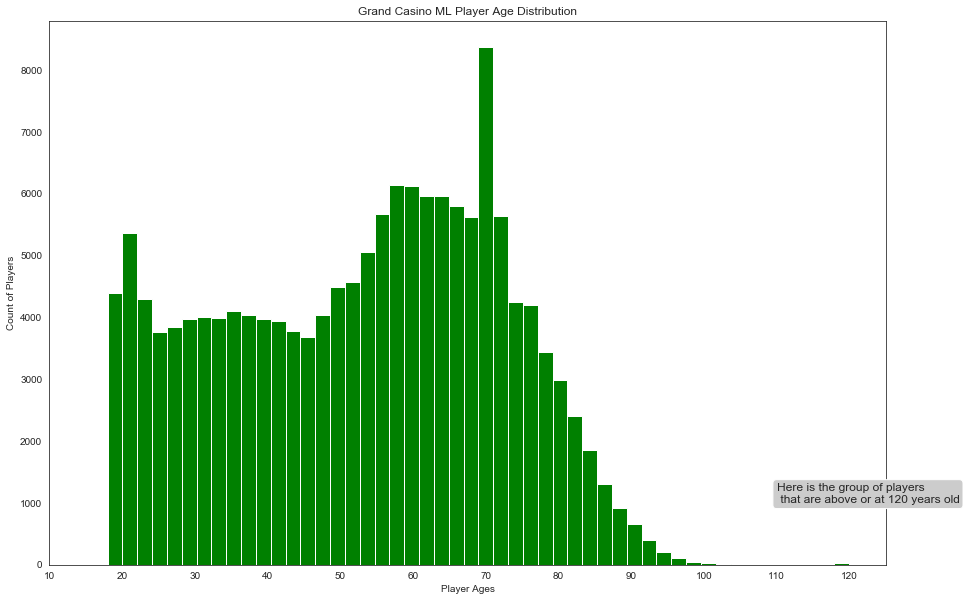

In [233]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Create a new plot figure

plt.figure(figsize= (15, 10))

## Plot the first three type / subtype combinations
plt.hist(ml_casino_age, 50, color = 'g')

## Set the xlabels to show more buckets to help identify things better
plt.xticks(np.arange(10, 130, step = 10))

## Add more descriptive labels
plt.xlabel("Player Ages")
plt.ylabel("Count of Players")

plt.annotate("Here is the group of players\n that are above or at 120 years old", 
            xy = (100.0, 100.0),
          xytext = (110.0, 1000.0),
         size = 12,
         bbox = dict(boxstyle="round", fc="0.8"))

## Add a descriptive title
plt.title("Grand Casino ML Player Age Distribution")

## Show the beautiful graph!
plt.show()

## We pull in a special plot from the seaborn library known as `distplot`.  This allows us to include a normal distribution overlaid the histogram above.

## The y-axis is the probability density function for the kernel density estimation.  However, this is the probability density and <i> not </i> a probability.

## It is helpful for relative comparison between the different buckets of Age.

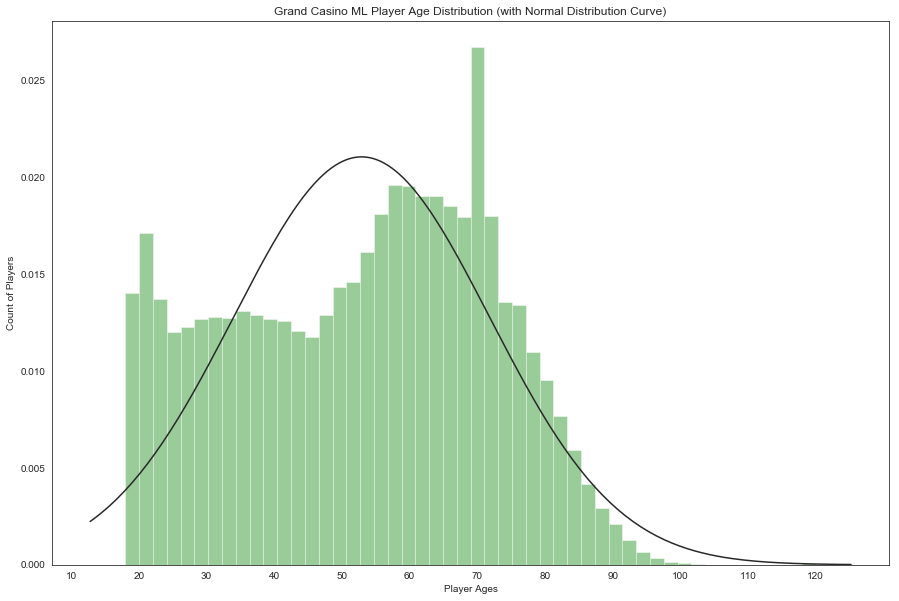

In [242]:
## Import a normal distribution from scipy
from scipy.stats import norm

## Build a new plot
plt.figure(1, figsize=(15, 10))

## Use a special function in seaborn to build a plot with the normal curve attached
sns.distplot(ml_casino_age, hist = True, fit = norm, kde = False, norm_hist = True,
             bins = 50, color = "green")

## Set the xlabels to show more buckets to help identify things better
plt.xticks(np.arange(10, 130, step = 10))

## Set better labels for the graph
plt.xlabel("Player Ages")
plt.ylabel("Count of Players")

## Set a title for the plot
plt.title("Grand Casino ML Player Age Distribution (with Normal Distribution Curve)")

## Show the plot
plt.show()

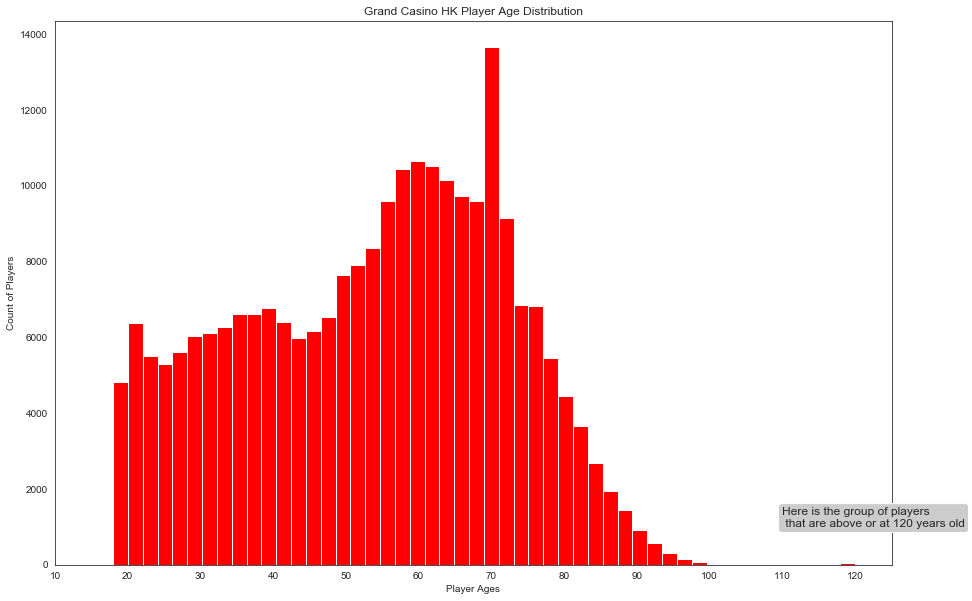

In [239]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Create a new plot figure

plt.figure(figsize= (15, 10))

## Plot the first three type / subtype combinations
plt.hist(hk_casino_age, 50, color = 'r')

## Set the xlabels to show more buckets to help identify things better
plt.xticks(np.arange(10, 130, step = 10))

## Add more descriptive labels
plt.xlabel("Player Ages")
plt.ylabel("Count of Players")

plt.annotate("Here is the group of players\n that are above or at 120 years old", 
            xy = (100.0, 100.0),
          xytext = (110.0, 1000.0),
         size = 12,
         bbox = dict(boxstyle="round", fc="0.8"))

## Add a descriptive title
plt.title("Grand Casino HK Player Age Distribution")

## Show the beautiful graph!
plt.show()

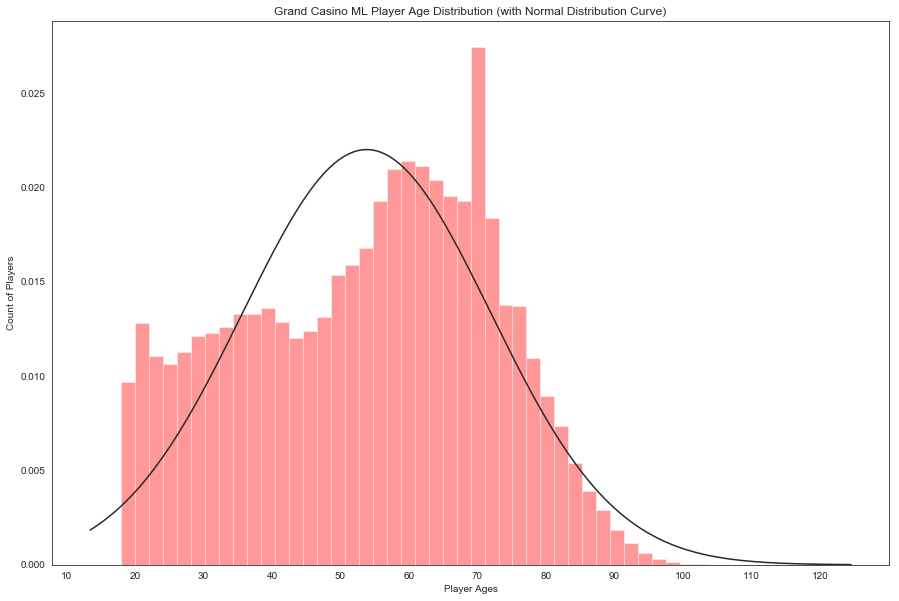

In [238]:
## Import a normal distribution from scipy
from scipy.stats import norm

## Build a new plot
plt.figure(1, figsize=(15, 10))

## Use a special function in seaborn to build a plot with the normal curve attached
sns.distplot(hk_casino_age, fit = norm, kde = False, 
             bins = 50, color = "red")

## Set the xlabels to show more buckets to help identify things better
plt.xticks(np.arange(10, 130, step = 10))

## Set better labels for the graph
plt.xlabel("Player Ages")
plt.ylabel("Count of Players")

## Set a title for the plot
plt.title("Grand Casino ML Player Age Distribution (with Normal Distribution Curve)")

## Show the plot
plt.show()

In [244]:
player_dim_df_subset.head()

,Casino Site,City,State,Zip Code,Player Tier,Last Gamble Date,Month,Year,Marital Status,EstimatedHousehold Income,No. of Dependents,Marital Status,Birth Date,Age
0,Grand Casino ML,ELK RIVER,MN,55330,Preferred,2019-10-16 18:40:18.000,7,1961,Married Extremely Likely,138,Not as Likely to have a child,Married Extremely Likely,1961-07-01 00:00:00,58
1,Grand Casino ML,GARFIELD,MN,56332,Preferred,2019-10-24 07:22:04.000,9,1935,Married Extremely Likely,36,Not Likely to have a child,Married Extremely Likely,1935-09-01 00:00:00,84
2,Grand Casino ML,ELK RIVER,MN,55330,Preferred,2019-10-23 07:46:00.000,10,1938,Unknown Scored,18,Not Likely to have a child,Unknown Scored,1938-10-01 00:00:00,81
3,Grand Casino ML,TALMOON,MN,56637,Preferred,2019-09-29 09:41:27.000,12,1951,Married Extremely Likely,49,Not Likely to have a child,Married Extremely Likely,1951-12-01 00:00:00,68
4,Grand Casino ML,PEQUOT LAKES,MN,56472,Preferred,2019-06-27 21:50:12.000,7,1964,NaN,NaN,NaN,NaN,1964-07-01 00:00:00,55


## Next, we'll do a histogram of the estimated household income field

In [314]:
## Remove NA values from the income field as a first step to clean up

ml_casino_income = grand_casino_ml_player_dim["EstimatedHousehold Income"].dropna()

hk_casino_income = grand_casino_hk_player_dim["EstimatedHousehold Income"].dropna()

In [315]:
ml_casino_income = ml_casino_income[ml_casino_income.str.isdigit()]

ml_casino_income = ml_casino_income.astype(int)

hk_casino_income = hk_casino_income[hk_casino_income.str.isdigit()]

hk_casino_income = hk_casino_income.astype(int)

In [328]:
print(ml_casino_income.groupby(ml_casino_income).count().head())

print()

print(ml_casino_income.groupby(ml_casino_income).count().tail())

EstimatedHousehold Income
6     449
7     495
8     521
9     636
10    751
Name: EstimatedHousehold Income, dtype: int64

EstimatedHousehold Income
23647    1
24024    1
24286    1
24653    1
24981    1
Name: EstimatedHousehold Income, dtype: int64


In [340]:
## Create some buckets to better plot the distribution of estimated household income
## The spread of values is quite significant

slices = [15, 20, 30, 40, 50, 60, 70, 80, 100, 110, 120, 150, 200, 250, 300, 350, 400, 450, 500,
    550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1100, 1300, 1500, 1700, 1900,
    2000, 3000, 4000, 5000, 6000, 25500]

## Save the sliced up income to a variable
income_dissected = pd.cut(ml_casino_income, slices)

In [341]:
## Save the sliced up income to a variable

income_dissected.value_counts(sort = False)

(15, 20]          4052
(20, 30]          7718
(30, 40]          9267
(40, 50]         10453
(50, 60]          8021
(60, 70]         12211
(70, 80]          9077
(80, 100]        14980
(100, 110]        3464
(110, 120]        6063
(120, 150]        8202
(150, 200]        4816
(200, 250]        3551
(250, 300]           0
(300, 350]           0
(350, 400]           0
(400, 450]           0
(450, 500]           0
(500, 550]           0
(550, 600]           0
(600, 650]           0
(650, 700]           0
(700, 750]           0
(750, 800]           0
(800, 850]           0
(850, 900]           0
(900, 950]           0
(950, 1000]          0
(1000, 1100]         0
(1100, 1300]         0
(1300, 1500]         0
(1500, 1700]         0
(1700, 1900]         0
(1900, 2000]         0
(2000, 3000]         0
(3000, 4000]         0
(4000, 5000]         0
(5000, 6000]         1
(6000, 25500]       55
Name: EstimatedHousehold Income, dtype: int64

## What an interesting observation on the incomes!  There is a large gap between the household incomes below $250K a year and above that line - and only 56 observations with household income above 6M a year.

## So we will subset this dataset one more time for household incomes below $250K.

In [343]:
## Subset the incomes below $250000

ml_casino_income_below_250 = ml_casino_income[ml_casino_income < 250]

hk_casino_income_below_250 = hk_casino_income[hk_casino_income < 250]

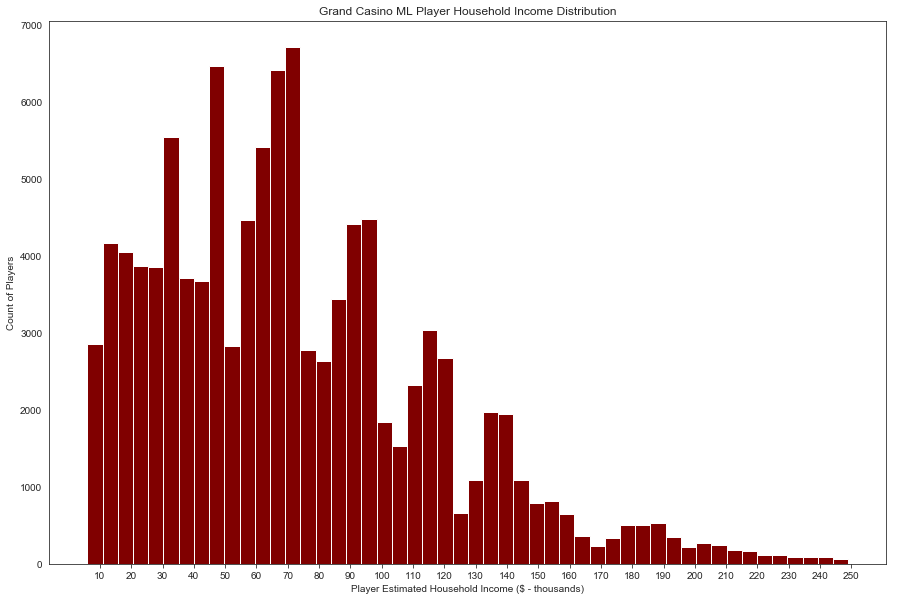

In [375]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Create a new plot figure

plt.figure(figsize= (15, 10))

## Plot the first three type / subtype combinations
plt.hist(ml_casino_income_below_250, 50, color = 'maroon')

plt.xticks(np.arange(10, 260, step = 10))

plt.tick_params(bottom = True)

## Set better labels for the graph
plt.xlabel("Player Estimated Household Income ($ - thousands)")
plt.ylabel("Count of Players")

## Set a title for the plot
plt.title("Grand Casino ML Player Household Income Distribution")

## Show the plot
plt.show()

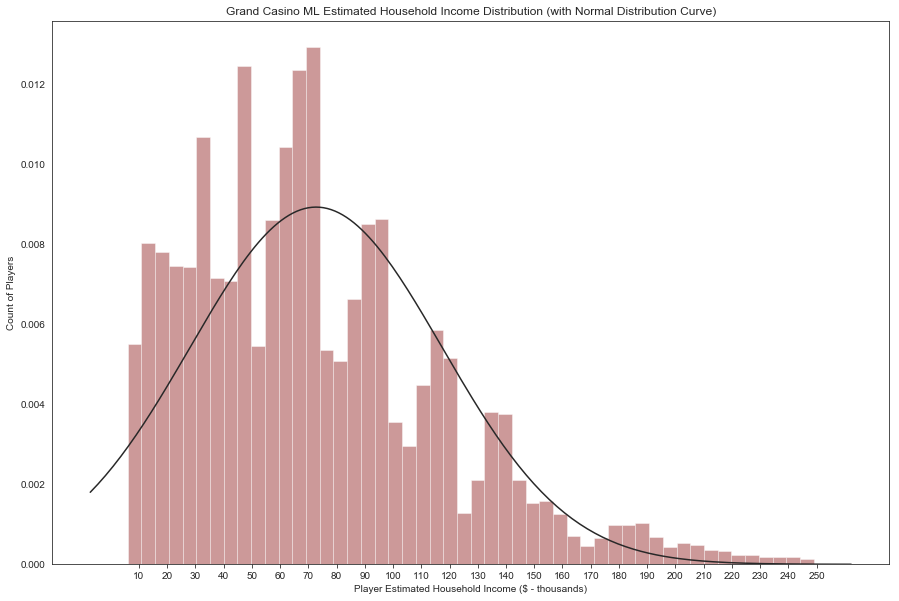

In [376]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Create a new plot figure

plt.figure(figsize= (15, 10))

## Use a special function in seaborn to build a plot with the normal curve attached
sns.distplot(ml_casino_income_below_250, fit = norm, kde = False, color = "maroon")

plt.xticks(np.arange(10, 260, step = 10))

plt.tick_params(bottom = True)

## Set better labels for the graph
plt.xlabel("Player Estimated Household Income ($ - thousands)")
plt.ylabel("Count of Players")

## Set a title for the plot
plt.title("Grand Casino ML Estimated Household Income Distribution (with Normal Distribution Curve)")

## Show the plot
plt.show()

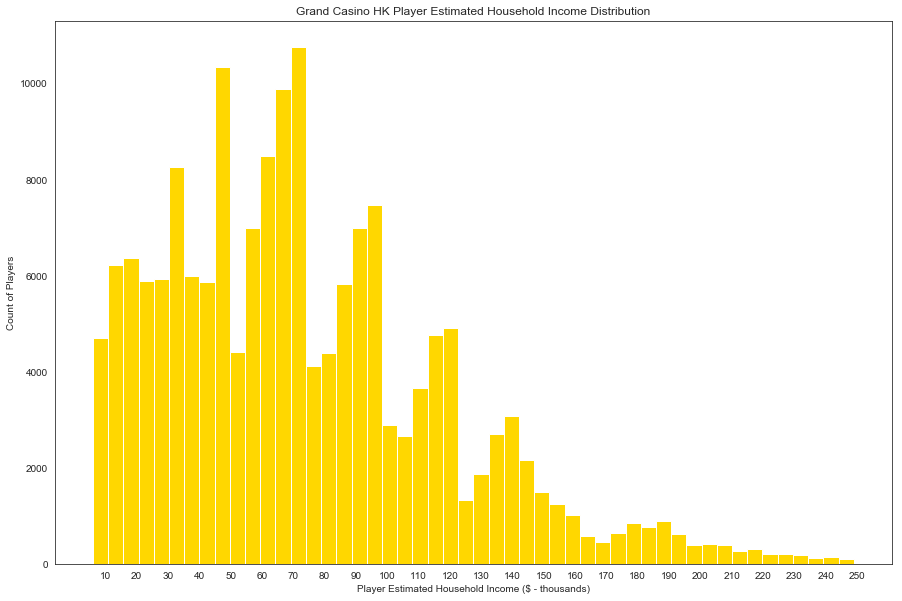

In [377]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Create a new plot figure

plt.figure(figsize= (15, 10))

## Plot the first three type / subtype combinations
plt.hist(hk_casino_income_below_250, 50, color = 'gold')

plt.xticks(np.arange(10, 260, step = 10))

## Set better labels for the graph
plt.xlabel("Player Estimated Household Income ($ - thousands)")
plt.ylabel("Count of Players")

## Set a title for the plot
plt.title("Grand Casino HK Player Estimated Household Income Distribution")

## Show the plot
plt.show()

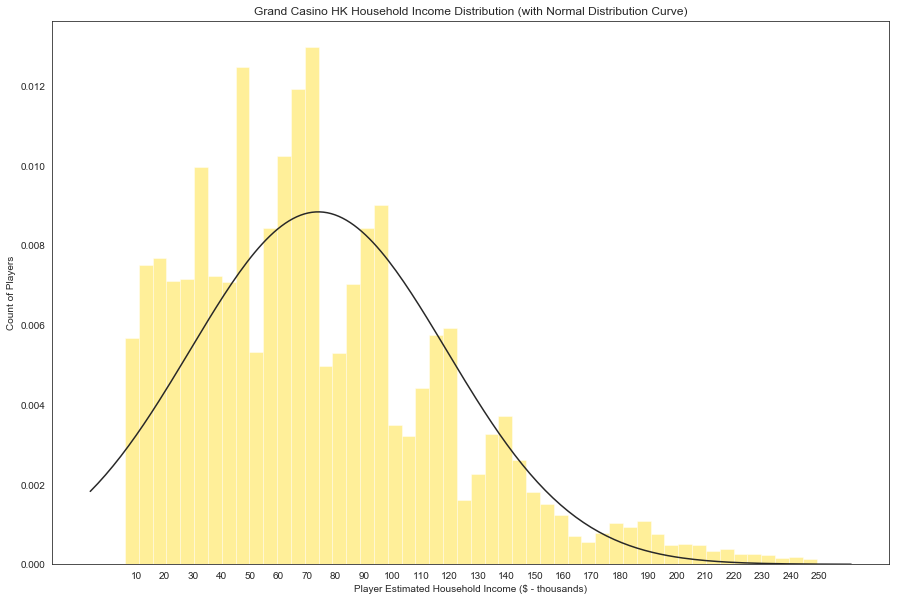

In [380]:
### Reset seaborn to the default background - for better viewing
sns.set_style("white")

## Create a new plot figure

plt.figure(figsize= (15, 10))

## Use a special function in seaborn to build a plot with the normal curve attached
sns.distplot(hk_casino_income_below_250, fit = norm, kde = False, color = "gold")

plt.xticks(np.arange(10, 260, step = 10))

## Set better labels for the graph
plt.xlabel("Player Estimated Household Income ($ - thousands)")
plt.ylabel("Count of Players")

## Set a title for the plot
plt.title("Grand Casino HK Household Income Distribution (with Normal Distribution Curve)")

## Show the plot
plt.show()